### BADASS Analysis - can we tell the difference between amino acids, sugars, lipids and nucleobases?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Fatty acids data

In [3]:
l_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Large_array_FA_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

In [4]:
s_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Standard_array_FA_results/',
    control_peptides=['GRP35', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                      'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                      'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                      'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                      'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                      'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                      'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                      'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    control_analytes=[]
)

Amino acids data

In [5]:
l_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Large_array_AA_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

In [6]:
s_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Standard_array_AA_results/',
    control_peptides=['GRP35', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                      'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                      'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                      'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                      'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                      'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                      'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                      'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    control_analytes=[]
)

Sugar data

In [7]:
l_sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Large_array_sugar_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

In [8]:
s_sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/All_small_molecules/Standard_array_sugar_results/',
    control_peptides=['GRP35', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                      'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                      'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                      'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                      'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                      'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                      'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                      'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    control_analytes=[]
)

Locate xlsx files

In [9]:
l_fa_fluor_data.group_xlsx_repeats()

In [10]:
s_fa_fluor_data.group_xlsx_repeats()

In [11]:
l_aa_fluor_data.group_xlsx_repeats()

In [12]:
s_aa_fluor_data.group_xlsx_repeats()

In [13]:
l_sugar_fluor_data.group_xlsx_repeats()

In [14]:
s_sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [15]:
l_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_10.xlsx
 WARNING - fluorescence of (O + GRP52 + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_10.xlsx


In [16]:
s_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Refo

Have checked data for Ol + GRP52 on plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_7.xlsx - the average fluorescence of Ol + DPH is slightly higher than that of Ol + GRP52 + DPH, but not concerningly so - the values are very similar, just indicates that Ol displaces effectivly all of the DPH from barrel GRP52.

In [17]:
l_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

In [18]:
s_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

In [19]:
l_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/fru_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/gluam_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/mal_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/mal_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_D

In [20]:
s_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/fru_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/gluam_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/mal_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/mal_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_sugar_csvs/glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_D

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [21]:
l_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16943537676233217, GRP52: 0.06116168052680828) 
 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, CCHex2-I24K: 0.7298984369220832, CCHept-I24N: 1.025850279828279, CCHept-L28W: 0.8024693953235129, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, NLKEIA: 0.4503762960705691, CCHept-L28K: 0.9199052057237955, CCHept-I24T: 0.7484094789503426, CCHept-L7Y: 1.038708261859428, CCHex2: 0.25144269999691565, CCHept-I17G-L21G: 0.5025020784268767, CCHept-I17H: 1.0242690436554487, CCHept-I24H: 0.7386291285565466, CCHept-L28Y: 0.8168417069884344, CCHept-I17A-L21A: 0.7117407900052798, CCHept-L21S-I24S: 0.9652350222314914, CCHept-I24Y: 0.9273765511080094, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, CCHept-L14A: 0.6959533474811951, CCHept-L7K: 1.1402495043637098, CCHept-L21N-I24N: 0.7200170187269314, CCHept-L21S-I24Y: 0.9440319306961015, GRP52: 0.6552047682340

In [22]:
s_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16943537676233217, GRP52: 0.06116168052680828) 
 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, CCHex2: 0.25144269999691565, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, GRP52: 0.6552047682340516, CCHept-I24E: 0.7892347226434583, GRP63: 0.9110290681078292, CCHept-I24K: 0.5921408649782045, CCHept-I17K: 0.5593147318816813) 


In [23]:
l_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = QLKEIA: 1.1058902102013586, NLKEIA: 0.6432415609183197, CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 
 Outlier excluded from final output dataset: R, 6 (flagged readings = CCPent-I24K: 0.36275988972394413) 
 Outlier excluded from final output dataset: E, 3 (flagged readings = CCHept-I17A-L21A: 0.4913996193607859) 


In [24]:
s_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 


In [25]:
l_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: mal, 0 (flagged readings = CCHept-I24T: 0.7235089423170673) 


In [26]:
s_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

In [27]:
l_fa_fluor_data.ml_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
1   0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
2   0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
3   0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
4   0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
5   0.170604   5.456000     0.014097     0.117293     0.102808  0.025129   
6   0.179082   3.084112     0.021682     0.138316     0.127927  0.026663   
7   0.177250   3.764368     0.047508     0.149798     0.103648  0.027803   
8   0.159486   3.953846     0.016181     0.101732     0.095983  0.024939   
9   0.062063   1.681818     0.008750     0.097138     0.173016  0.019171   
10  0.066087   1.538462     0.006339     0.079017     0.258288  0.018406   
11  0.081692   1.381910     0.005407     0.075357     0.321024  0.022406   
12  0.071201   1.640351     0.003875     0.063482     0.296945  0.022983   
13  0.081579   1.631944     0.006465     0.066950     0.194404  0.024451   
14  0.057734   1.833333     0.011801     0.114172     0.223357  0.016017   
15  0.044842   0.839080     0.005967     0.135403     0.148415  0.010459   
16  0.047362   1.020833     0.005980     0.103364     0.159434  0.012905   
17  0.055282   1.210884     0.008792     0.086595     0.160268  0.015657   
18  1.022571   0.952756     0.753516     1.087744     0.998670  0.631529   
19  1.176855   1.125714     0.652254     1.008486     1.148558  0.657004   
20  1.004083   1.343511     0.757447     1.124091     1.094118  0.668542   
21  0.932209   1.280000     0.688117     0.967367     1.057789  0.697742   
22  0.924206   1.282759     0.777142     1.084270     1.037485  0.685886   
23  0.948754   1.227273     0.878522     1.004671     1.018159  0.698780   
24  1.046289   1.159722     0.832239     1.103595     1.166603  0.720903   
25  1.004783   0.975976     0.861914     1.155559     1.204928  0.726710   
26  1.011156   0.794444     0.790489     1.114545     1.145403  0.732104   
27  0.979291   0.993827     1.014856     1.062500     1.116327  0.744162   
28  0.903368   1.453901     0.554593     1.190752     1.075472  0.489449   
29  0.855617   0.685393     0.576447     1.255267     1.058119  0.540944   
30  1.052817   0.842105     0.963315     1.332277     1.042014  0.515465   
31  0.996725   1.167513     0.710384     1.417928     1.059033  0.515466   
32  0.894747   1.079545     0.732024     1.409620     1.108137  0.502970   
33  0.877188   1.007042     0.679841     1.231749     1.040937  0.502865   
34  0.889601   1.029070     0.719770     1.106825     1.105547  0.487414   
35  0.881351   1.024096     0.678937     1.304746     1.131148  0.533250   
36  0.857674   1.014085     0.818040     1.231109     1.106649  0.484938   
37  0.845154   1.305085     0.698801     1.261290     1.081986  0.490687   
38  0.045607   0.661202     0.006825     0.121669     0.420932  0.006803   
39  0.054125   0.739130     0.005830     0.132827     0.441681  0.006874   
40  0.055639   0.971631     0.006516     0.140290     0.554430  0.008491   
41  0.057048   0.572254     0.006358     0.133426     0.479014  0.009088   
42  0.056074   1.038043     0.009396     0.112380     0.304307  0.008337   
43  0.047794   1.297710     0.008264     0.109551     0.576740  0.009534   
44  0.060709   1.091892     0.009088     0.103913     0.457480  0.011653   
45  0.048991   0.601064     0.005819     0.096681     0.502240  0.007795   
46  0.053244   0.684932     0.006299     0.081320     0.455614  0.008914   
47  0.055839   0.805405     0.007068     0.100139     0.432981  0.009938   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.274981  0.038749     0.254368     0.302122  ...          0.106926   
1   0.299807  0.040383     0.246034     0.229747  ...          0.100787   
2   0.251772  0.036533     0.237000     0.218262  ...   

In [28]:
s_fa_fluor_data.ml_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0   0.148266  0.024628  0.274981  0.115124  0.962721  0.299053  0.077375   
1   0.150689  0.022403  0.299807  0.109012  1.370370  0.251605  0.083843   
2   0.134739  0.022347  0.251772  0.117537  1.249737  0.337395  0.078243   
3   0.144157  0.023343  0.286811  0.086068  1.397661  0.297689  0.077732   
4   0.140496  0.027553  0.318417  0.086620  1.344584  0.274345  0.068969   
5   0.170604  0.025129  0.296986  0.042631  0.683754  0.266753  0.091161   
6   0.179082  0.026663  0.333001  0.040862  0.810047  0.251251  0.084183   
7   0.177250  0.027803  0.319346  0.050148  0.828720  0.238071  0.078018   
8   0.159486  0.024939  0.326270  0.036215  0.626267  0.284646  0.086710   
9   0.062063  0.019171  0.033922  0.021126  2.454878  0.410467  0.084123   
10  0.066087  0.018406  0.025772  0.013037  2.851155  0.394411  0.076990   
11  0.081692  0.022406  0.030396  0.017066  2.459842  0.446497  0.070780   
12  0.071201  0.022983  0.027129  0.008282  3.149968  0.396712  0.071278   
13  0.081579  0.024451  0.027895  0.012213  2.730430  0.403319  0.091607   
14  0.057734  0.016017  0.032250  0.026549  1.580369  0.396653  0.058658   
15  0.044842  0.010459  0.022233  0.020012  2.160352  0.321663  0.064198   
16  0.047362  0.012905  0.020139  0.014109  2.378208  0.308061  0.064648   
17  0.055282  0.015657  0.023123  0.015770  2.438686  0.290587  0.060632   
18  1.022571  0.631529  0.837688  0.421837  1.755871  0.472208  0.919843   
19  1.176855  0.657004  0.899955  0.445333  1.630830  0.570041  0.904515   
20  1.004083  0.668542  0.994548  0.386495  1.591556  0.572355  0.914612   
21  0.932209  0.697742  0.949528  0.397352  1.616342  0.601395  0.915160   
22  0.924206  0.685886  0.951342  0.457556  1.595443  0.652309  0.878873   
23  0.948754  0.698780  0.810435  0.363183  1.500745  0.519878  0.975358   
24  1.046289  0.720903  0.946354  0.341101  1.562620  0.554000  0.866981   
25  1.004783  0.726710  0.978332  0.357478  1.619072  0.555660  0.829409   
26  1.011156  0.732104  0.980690  0.334027  1.711474  0.614346  0.773844   
27  0.979291  0.744162  0.984101  0.380032  1.696798  0.610648  0.815018   
28  0.903368  0.489449  0.814844  0.348957  1.485137  0.491959  0.740981   
29  0.855617  0.540944  0.832793  0.329401  1.743861  0.521996  0.745998   
30  1.052817  0.515465  1.108774  0.253735  1.907134  0.532840  0.666468   
31  0.996725  0.515466  1.072378  0.312879  2.023868  0.522218  0.658861   
32  0.894747  0.502970  1.041062  0.300224  1.744966  0.506945  0.646125   
33  0.877188  0.502865  0.894216  0.262074  1.556552  0.408534  0.787412   
34  0.889601  0.487414  0.648812  0.321964  1.541507  0.470317  0.650548   
35  0.881351  0.533250  1.054857  0.278029  1.841788  0.452056  0.740243   
36  0.857674  0.484938  0.916915  0.295844  2.003040  0.444773  0.702524   
37  0.845154  0.490687  0.974054  0.277357  1.677281  0.493000  0.657182   
38  0.045607  0.006803  0.019589  0.016944  1.093735  0.458854  0.129299   
39  0.054125  0.006874  0.017920  0.016273  1.285943  0.494647  0.121183   
40  0.055639  0.008491  0.019490  0.017302  1.242729  0.492987  0.124782   
41  0.057048  0.009088  0.021361  0.014345  1.494451  0.574471  0.128842   
42  0.056074  0.008337  0.029006  0.024482  1.189647  0.595970  0.134948   
43  0.047794  0.009534  0.027447  0.017886  0.733518  0.409876  0.103029   
44  0.060709  0.011653  0.026813  0.019963  1.018495  0.532510  0.119043   
45  0.048991  0.007795  0.021101  0.014395  1.040879  0.428037  0.123532   
46  0.053244  0.008914  0.021006  0.014779  1.120621  0.586371  0.121950   
47  0.055839  0.009938  0.020152  0.019290  1.308267  0.541500  0.139262   

    CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0      0.097338  0.005484     0.050307  0.046135     0.053877  0.452886   
1      0.136815  0.006551     0.051918  0.055280     0.062070  0.428712   
2      0.095594  0.005710     0.046348  0.054267     0.0

In [29]:
l_aa_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   1.026325  1.053571     1.034778     1.010514     1.004756  0.943744   
1   1.014910  0.937853     0.930433     1.044855     0.979722  0.866931   
2   1.176067  1.006849     0.934257     1.019873     0.980434  0.928815   
3   0.968238  0.878641     0.837904     0.888387     0.931401  0.876360   
4   1.011632  0.712166     0.864056     0.987900     0.964710  0.818861   
5   0.989725  1.139130     0.873952     0.977018     0.918447  0.814248   
6   0.981264  1.000000     0.915024     1.019939     0.934679  0.832860   
7   0.982294  1.044248     0.879690     0.876849     0.931399  0.859980   
8   0.976109  0.850746     0.911490     0.960519     0.993028  0.949563   
9   1.172955  0.856322     0.968225     1.041973     0.970500  1.007900   
10  1.055407  0.858382     1.057894     1.067557     0.984581  0.936560   
11  1.033773  1.066079     0.997548     1.026339     0.945068  0.916875   
12  1.095672  1.024793     1.020617     1.061357     0.936312  0.942782   
13  1.001981  1.176471     0.935011     0.997896     0.916484  0.776465   
14  0.920046  0.851562     0.942115     0.968176     0.925701  0.927754   
15  0.878257  0.795620     0.935411     0.880725     0.875303  0.872184   
16  1.011153  0.992958     0.941305     0.888402     0.861906  0.918112   
17  1.051879  0.905797     1.121725     1.098495     1.014482  0.942035   
18  1.149086  0.683616     0.934032     1.057975     0.934924  0.951269   
19  0.941075  0.780423     0.850063     0.971042     0.986674  0.783746   
20  1.010064  0.905797     0.887739     1.090656     0.945020  0.972455   
21  1.046074  1.068182     0.966707     0.995206     0.935573  0.802243   
22  0.981874  1.087838     1.009571     1.025349     0.937250  0.900656   
23  1.037135  1.000000     0.923944     0.972539     0.928397  0.886508   
24  0.965096  0.994536     0.990409     1.032959     0.949301  0.906921   
25  1.036483  0.880795     0.864968     1.047196     0.959202  0.906947   
26  1.012070  1.132075     1.048700     1.104314     0.981594  0.948993   
27  1.046260  1.059459     0.943384     1.057794     0.971638  0.967880   
28  1.014316  0.854331     0.909236     0.917590     0.947695  0.990762   
29  1.015829  1.126374     0.996728     0.998135     0.963210  0.869580   
30  0.979676  0.954023     0.918322     0.922812     0.931199  0.930238   
31  1.025877  1.041667     0.925442     1.015227     1.000965  0.839242   
32  0.895242  0.786667     0.936800     0.814494     0.901722  0.918179   
33  1.041915  1.138614     0.960142     0.909119     0.947007  0.806508   
34  1.030931  1.311475     0.920490     0.989673     0.881294  0.964213   
35  1.009954  1.144509     1.077996     1.026483     0.999738  0.940467   
36  0.882853  0.579439     0.939586     0.939522     0.853172  0.911123   
37  0.923840  1.520000     0.870054     0.854396     0.912125  0.795706   
38  1.042266  1.515723     0.886029     0.936381     0.949879  0.896599   
39  1.047779  2.000000     0.837868     1.015947     0.963729  0.910207   
40  0.991597  1.801587     0.662736     0.934360     0.852408  0.770376   
41  1.093379  1.730159     0.874666     1.048089     0.966698  0.982941   
42  1.081413  1.774390     1.068866     1.002002     0.983173  0.892411   
43  1.002247  1.598592     0.705118     0.940705     0.880726  0.744251   
44  1.072340  1.707692     0.693902     1.063752     0.897467  0.827298   
45  1.103635  1.832000     0.511031     1.113429     0.929349  0.640744   
46  1.060091  1.613095     0.716846     1.120461     0.956522  0.753939   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.020925  0.959427     1.004524     1.008347  ...          0.807070   
1   0.960059  0.924038     1.011650     1.078104  ...          0.879224   
2   1.055619  0.931324     1.066850     1.009037  ...          0.850430   
3   0.963258  0.816671     0.912440     0.923009  ...          0.911353   
4   0.919994  0.902752     0.9

In [30]:
s_aa_fluor_data.ml_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0   1.026325  0.943744  1.020925  0.828859  1.188418  0.912472  1.068432   
1   1.014910  0.866931  0.960059  0.919619  1.114418  0.858822  0.980590   
2   1.176067  0.928815  1.055619  0.837796  1.129153  0.876671  0.945262   
3   0.968238  0.876360  0.963258  0.704331  1.066952  0.821334  0.831480   
4   1.011632  0.818861  0.919994  0.808140  1.298170  0.959910  0.955043   
5   0.989725  0.814248  0.740058  0.884821  1.033119  0.804073  1.144127   
6   0.997902  0.732200  0.830969  0.919318  0.932857  0.823927  0.849935   
7   0.981264  0.832860  1.004771  0.841190  1.067788  0.897904  0.982793   
8   0.982294  0.859980  0.928579  0.844741  0.979122  0.846988  0.880849   
9   0.976109  0.949563  0.996667  0.928603  1.050979  1.055750  1.087073   
10  1.172955  1.007900  1.019342  0.869341  1.005268  0.973131  0.989500   
11  1.055407  0.936560  1.084719  0.837938  1.002874  1.021822  1.082513   
12  0.938707  0.792963  0.917199  1.185599  0.886913  0.964539  0.956205   
13  1.033773  0.916875  1.043706  0.891774  1.110161  1.021271  1.043254   
14  1.095672  0.942782  0.967531  0.874646  0.876930  0.913090  1.019619   
15  1.001981  0.776465  0.906775  1.068413  0.955132  0.898544  0.942648   
16  0.920046  0.927754  0.917282  1.122665  1.085730  1.036570  0.883061   
17  0.878257  0.872184  0.960214  1.009322  1.127614  1.060397  0.990745   
18  1.011153  0.918112  0.965003  0.923700  1.073462  0.970892  0.949922   
19  1.051879  0.942035  1.031910  0.919842  1.011236  0.976355  0.977364   
20  1.149086  0.951269  1.027293  0.938499  1.048113  0.937701  1.027522   
21  0.941075  0.783746  0.916271  0.941018  1.123656  1.044748  0.963467   
22  1.010064  0.972455  1.003541  0.836575  1.224758  0.928298  0.864103   
23  1.046074  0.802243  0.963522  0.887766  0.903488  0.814486  1.062798   
24  0.981874  0.900656  0.928103  0.951465  0.986382  0.968971  0.949982   
25  1.037135  0.886508  0.931141  0.822305  1.034596  0.884104  1.010238   
26  0.965096  0.906921  1.029898  0.856733  1.091729  0.953301  0.967775   
27  1.036483  0.906947  1.039386  0.939469  1.214543  0.857902  0.961671   
28  1.012070  0.948993  0.856452  1.043788  0.936170  0.990628  0.975463   
29  1.046260  0.967880  1.101256  1.029977  1.038501  0.970892  0.939209   
30  1.014316  0.990762  0.897870  1.009740  1.044436  0.916738  0.996276   
31  1.015829  0.869580  1.016383  0.945402  1.223825  0.952244  0.996418   
32  0.979676  0.930238  1.019816  0.859222  1.051243  1.026392  1.061149   
33  1.025877  0.839242  0.918696  1.058235  1.067131  1.116735  1.030361   
34  0.895242  0.918179  0.961791  0.893418  0.934125  0.813711  0.911868   
35  1.041915  0.806508  0.786366  1.052043  1.006693  0.884613  0.966354   
36  1.030931  0.964213  1.010827  0.943671  1.056853  0.946597  1.031375   
37  1.009954  0.940467  1.020772  1.053609  1.026290  0.997787  0.919126   
38  0.882853  0.911123  0.753476  0.861354  1.089047  0.951310  0.981925   
39  0.923840  0.795706  0.887345  0.563442  1.268180  0.816167  1.054285   
40  1.042266  0.896599  0.950980  0.747435  1.251526  0.892850  0.922486   
41  1.047779  0.910207  1.032148  0.562930  1.442345  0.846924  0.929208   
42  0.991597  0.770376  0.847440  0.524585  1.188288  0.700290  1.043653   
43  1.093379  0.982941  0.900051  0.682701  1.358779  0.867691  0.970586   
44  1.081413  0.892411  1.026809  0.704146  1.309672  0.873617  0.921324   
45  1.002247  0.744251  0.831296  0.664252  1.060084  0.784299  0.853157   
46  1.072340  0.827298  0.778373  0.520568  1.467059  0.737657  0.967105   
47  1.103635  0.640744  0.899216  0.373705  2.246137  0.466378  0.839205   
48  1.060091  0.753939  0.956116  0.346233  1.694444  0.561294  0.829359   

    CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0      0.988935  1.033920     1.065044  1.028560     0.908108  1.017292   
1      1.076983  1.052124     0.990718  0.983649     0.

In [31]:
l_sugar_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.987514  0.877778     0.986988     1.059325     1.026094  0.989860   
1   1.099456  1.086331     1.057084     1.010606     0.974457  1.007267   
2   0.992739  0.766497     0.979408     0.893519     0.959103  0.946020   
3   0.978663  0.852041     0.896086     0.934067     0.900254  0.916977   
4   0.861934  0.977401     0.922746     0.881683     0.971275  0.921537   
5   1.007643  1.136842     0.984371     0.942875     0.958499  1.023786   
6   1.027008  0.987421     1.022222     0.988206     0.941795  0.899918   
7   0.967471  1.076923     0.875335     0.936435     0.885511  0.950167   
8   0.979685  1.123810     1.014942     0.996560     0.980422  0.901585   
9   1.003561  1.246269     0.901285     0.977691     0.906919  0.946258   
10  0.982028  1.030864     0.929455     0.860856     0.982105  1.024211   
11  1.081686  1.201342     1.044965     1.023090     0.964595  1.000651   
12  1.022970  0.759804     1.006251     0.906501     0.949419  0.971398   
13  1.050763  0.672414     0.995274     0.907771     0.949867  0.947530   
14  1.071890  1.287500     1.026616     1.082397     1.004300  1.005241   
15  0.913383  0.714286     0.886249     0.978496     0.976694  0.853735   
16  0.948889  0.956522     0.914516     0.936120     0.886286  0.800457   
17  1.035721  1.330709     0.918044     0.990085     0.944822  1.053504   
18  0.922048  0.879518     0.917347     0.841628     0.860733  0.935251   
19  0.977739  0.824000     0.959244     0.935677     0.938273  0.932075   
20  1.065949  0.842105     0.929661     0.971606     0.985371  0.940908   
21  1.025125  0.923913     1.093705     0.977410     0.968770  0.835013   
22  0.927596  0.680982     0.902190     1.060440     0.934179  0.987044   
23  0.874801  1.381356     0.832338     0.915149     0.868800  0.972228   
24  1.073218  1.175879     0.781405     1.004598     0.960390  0.979444   
25  0.827491  1.294118     0.875478     0.907203     0.889089  0.971505   
26  0.920649  0.339806     0.945213     0.829368     0.940705  0.923421   
27  0.940694  0.992063     0.896260     0.907366     0.997346  0.862034   
28  1.072328  0.587097     1.038842     1.097082     0.985564  0.999299   
29  1.055340  0.980000     1.027093     1.023074     1.005902  1.012482   
30  1.010585  0.956311     0.985347     0.962564     0.892610  0.928648   
31  0.896438  0.796380     1.001264     0.955277     0.920431  0.908134   
32  0.933532  0.813433     0.917152     1.034626     0.934390  0.790661   
33  1.059771  1.039106     1.041573     1.029624     1.013708  0.962149   
34  1.033166  0.870370     0.951152     1.029202     0.941163  1.064842   
35  1.027387  0.901639     1.009946     0.974328     0.971336  0.995934   
36  0.941257  0.723404     0.887630     0.926377     0.979108  0.907382   
37  1.064028  0.914894     1.061253     0.992939     0.995103  0.987144   
38  1.071873  0.712871     1.063458     0.915420     1.028948  0.874440   
39  0.928307  1.080000     0.917863     0.918256     0.833694  0.960239   
40  1.090924  0.761905     0.941823     0.953420     0.901014  0.980410   
41  0.922291  1.061644     0.874554     0.901049     0.901821  0.895090   
42  0.984411  0.866242     0.964744     0.927832     0.949204  0.918275   
43  0.957130  1.193182     0.848753     0.871554     0.904407  0.958908   
44  1.043279  0.815217     0.897529     0.964326     1.015679  0.870522   
45  0.942686  0.634146     0.958832     0.958229     0.973239  0.831853   
46  0.910304  0.787097     0.946507     0.920822     0.951738  0.967693   
47  1.065355  0.729032     0.979030     0.945389     0.904783  1.050744   
48  0.957442  0.787356     1.021690     0.991537     1.005895  0.918973   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.001767  0.993522     1.032377     0.964796  ...          0.987603   
1   0.985131  1.056828     1.002928     1.045810  ...          0.954896   
2   0.938332  0.915374     0.9

In [32]:
s_sugar_fluor_data.ml_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0   0.987514  0.989860  1.001767  0.981947  0.956059  1.015317  0.979482   
1   1.099456  1.007267  0.985131  1.040505  1.037949  1.000911  0.898211   
2   0.992739  0.946020  0.938332  1.081271  1.082186  1.111005  1.006841   
3   0.978663  0.916977  1.025826  1.093374  1.061705  0.991393  1.035772   
4   0.861934  0.921537  0.879937  1.082231  1.036994  0.963586  0.919990   
5   1.007643  1.023786  1.051353  1.262456  0.955272  1.002143  0.984839   
6   1.027008  0.899918  0.947020  1.153133  0.936407  0.978620  0.974936   
7   0.967471  0.950167  0.979929  0.908916  0.998831  0.962346  0.966566   
8   0.979685  0.901585  0.967196  1.104320  0.849404  1.036462  0.944574   
9   1.003561  0.946258  1.036890  0.893965  0.896509  1.038998  1.012032   
10  0.982028  1.024211  0.937164  1.071805  0.928467  1.055427  0.997376   
11  1.081686  1.000651  0.978093  1.017463  1.031896  1.071577  1.042312   
12  1.022970  0.971398  0.906259  1.006754  1.041363  1.004714  1.046309   
13  1.050763  0.947530  0.941567  0.862269  0.953299  1.064871  0.899426   
14  1.071890  1.005241  1.038121  0.998928  0.997963  1.014264  0.911549   
15  0.913383  0.853735  0.906618  1.292591  0.953904  1.076358  1.041172   
16  0.948889  0.800457  0.900302  0.974493  0.987044  1.154096  0.988332   
17  1.035721  1.053504  1.036357  1.025628  0.871823  1.116212  1.061242   
18  0.922048  0.935251  0.947983  0.924679  0.964415  1.119590  0.851516   
19  0.977739  0.932075  0.992507  1.229584  0.971843  1.030661  0.967549   
20  1.065949  0.940908  0.981503  1.144355  0.998110  1.035430  1.057421   
21  1.025125  0.835013  0.980366  0.994146  0.891866  0.999251  0.967079   
22  0.927596  0.987044  0.913577  0.842249  1.029708  1.009623  0.949003   
23  0.874801  0.972228  0.839329  1.173866  0.951392  1.137439  1.042677   
24  1.073218  0.979444  1.035411  1.078650  1.049045  0.955783  0.971344   
25  0.827491  0.971505  0.987649  1.127468  0.882699  0.987277  1.064428   
26  0.920649  0.923421  0.859485  1.019982  1.047468  1.128372  0.961807   
27  0.940694  0.862034  0.891111  1.201093  0.923269  1.041881  1.058670   
28  1.072328  0.999299  0.918478  1.134921  0.931114  1.055582  0.997569   
29  1.055340  1.012482  0.980785  1.090425  0.966087  0.998559  0.989337   
30  1.010585  0.928648  0.913485  1.026681  1.000916  1.010733  0.907932   
31  0.896438  0.908134  0.897475  0.993429  1.246850  1.015419  1.087703   
32  0.933532  0.790661  0.935129  1.170643  0.975448  0.946957  0.948777   
33  1.059771  0.962149  1.084072  0.830399  1.037321  0.998357  0.925372   
34  1.033166  1.064842  1.033665  1.022531  1.094789  0.996237  0.956047   
35  1.027387  0.995934  0.961308  1.110065  0.889219  1.043397  0.891481   
36  0.941257  0.907382  0.891725  0.935727  0.864880  1.066115  1.029254   
37  1.064028  0.987144  1.051739  1.060003  0.983353  1.016096  0.969978   
38  1.071873  0.874440  0.908308  1.136340  0.987703  1.074145  0.946492   
39  0.928307  0.960239  0.985232  0.961065  0.863428  1.110358  0.906087   
40  1.010700  0.991087  1.066376  0.881245  0.990757  1.091341  0.933374   
41  1.090924  0.980410  0.946903  1.013305  1.076098  1.063092  0.971608   
42  0.922291  0.895090  1.078007  1.024128  0.959685  1.089831  1.071986   
43  0.984411  0.918275  0.895280  1.034205  0.914868  0.990969  0.885092   
44  0.957130  0.958908  0.918036  0.854267  0.994664  1.095558  0.946942   
45  1.043279  0.870522  0.957748  1.395127  0.958830  1.173027  1.039485   
46  0.942686  0.831853  0.815995  1.303727  0.841496  0.944863  1.009690   
47  0.910304  0.967693  0.880492  1.098998  0.970533  1.032315  0.966201   
48  1.065355  1.050744  1.036473  0.999458  1.108685  1.010854  1.011942   
49  0.957442  0.918973  0.975002  1.055836  1.202469  1.088056  0.993443   

    CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0      1.030626  0.956924     0.997263  0.983258     0

Changes analyte name to "FA", "AA" or "S" as appropriate, then concatentates the dataframes into a single dataset

In [33]:
l_fa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_fa_fluor_data.ml_fluor_data['Analyte'].tolist())
l_fa_fluor_data.ml_fluor_data['Analyte'] = ['FA']*l_fa_fluor_data.ml_fluor_data.shape[0]

In [34]:
l_aa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_aa_fluor_data.ml_fluor_data['Analyte'].tolist())
l_aa_fluor_data.ml_fluor_data['Analyte'] = ['AA']*l_aa_fluor_data.ml_fluor_data.shape[0]

In [35]:
l_sugar_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_sugar_fluor_data.ml_fluor_data['Analyte'].tolist())
l_sugar_fluor_data.ml_fluor_data['Analyte'] = ['S']*l_sugar_fluor_data.ml_fluor_data.shape[0]

In [36]:
l_small_mol_fluor_data = pd.concat([l_fa_fluor_data.ml_fluor_data, l_aa_fluor_data.ml_fluor_data,
                                    l_sugar_fluor_data.ml_fluor_data],
                                   axis=0, ignore_index=True)

In [37]:
l_small_mol_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0    0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
1    0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
2    0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
3    0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
4    0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
..        ...        ...          ...          ...          ...       ...   
139  1.043279   0.815217     0.897529     0.964326     1.015679  0.870522   
140  0.942686   0.634146     0.958832     0.958229     0.973239  0.831853   
141  0.910304   0.787097     0.946507     0.920822     0.951738  0.967693   
142  1.065355   0.729032     0.979030     0.945389     0.904783  1.050744   
143  0.957442   0.787356     1.021690     0.991537     1.005895  0.918973   

        CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21H-I24H  \
0    0.274981  0.038749     0.254368     0.302122  ...          0.342888   
1    0.299807  0.040383     0.246034     0.229747  ...          0.300631   
2    0.251772  0.036533     0.237000     0.218262  ...          0.316037   
3    0.286811  0.036867     0.208114     0.211769  ...          0.226626   
4    0.318417  0.030803     0.168127     0.204507  ...          0.250059   
..        ...       ...          ...          ...  ...               ...   
139  0.957748  0.996410     1.009835     0.966864  ...          0.890737   
140  0.815995  0.868766     0.967687     0.939584  ...          1.014978   
141  0.880492  0.907022     1.031737     0.913931  ...          1.005815   
142  1.036473  0.980638     0.987765     1.026119  ...          0.988014   
143  0.975002  0.986370     1.002105     0.964289  ...          0.917815   

     CCHept-I17T     GRP80  CCHept-I17K  CCPent-I24K  CCHept-I24S  CCHept-L7W  \
0       0.871393  0.452886     0.868912     0.303119     0.093401    0.059421   
1       0.689495  0.428712     0.882574     0.262507     0.100272    0.058162   
2       0.930879  0.428471     0.793027     0.266378     0.089277    0.052445   
3       0.807314  0.424964     0.689922     0.219398     0.083607    0.045236   
4       0.850965  0.428595     0.744348     0.273830     0.081859    0.057470   
..           ...       ...          ...          ...          ...         ...   
139     0.930682  0.935442     1.014216     1.007177     0.943899    0.917981   
140     1.162041  1.152502     1.186774     0.989189     1.040217    1.077179   
141     1.045229  1.023863     1.052058     1.092388     1.033712    1.043104   
142     1.086545  0.899028     1.091971     1.129032     0.976047    1.000797   
143     1.028448  0.986290     0.992262     0.983692     1.015216    0.988024   

     CCHept-I24P  Analyte  Orig_analyte  
0       0.115075       FA             N  
1       0.112344       FA             N  
2       0.095372       FA             N  
3       0.081846       FA             N  
4       0.079455       FA             N  
..           ...      ...           ...  
139     0.925322        S           mal  
140     1.097021        S           mal  
141     1.049289        S           mal  
142     0.857612        S           mal  
143     1.028021        S           mal  

[144 rows x 48 columns]

In [38]:
s_fa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(s_fa_fluor_data.ml_fluor_data['Analyte'].tolist())
s_fa_fluor_data.ml_fluor_data['Analyte'] = ['FA']*s_fa_fluor_data.ml_fluor_data.shape[0]

In [39]:
s_aa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(s_aa_fluor_data.ml_fluor_data['Analyte'].tolist())
s_aa_fluor_data.ml_fluor_data['Analyte'] = ['AA']*s_aa_fluor_data.ml_fluor_data.shape[0]

In [40]:
s_sugar_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(s_sugar_fluor_data.ml_fluor_data['Analyte'].tolist())
s_sugar_fluor_data.ml_fluor_data['Analyte'] = ['S']*s_sugar_fluor_data.ml_fluor_data.shape[0]

In [41]:
s_small_mol_fluor_data = pd.concat([s_fa_fluor_data.ml_fluor_data, s_aa_fluor_data.ml_fluor_data,
                                    s_sugar_fluor_data.ml_fluor_data],
                                   axis=0, ignore_index=True)

In [42]:
s_small_mol_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0    0.148266  0.024628  0.274981  0.115124  0.962721  0.299053  0.077375   
1    0.150689  0.022403  0.299807  0.109012  1.370370  0.251605  0.083843   
2    0.134739  0.022347  0.251772  0.117537  1.249737  0.337395  0.078243   
3    0.144157  0.023343  0.286811  0.086068  1.397661  0.297689  0.077732   
4    0.140496  0.027553  0.318417  0.086620  1.344584  0.274345  0.068969   
..        ...       ...       ...       ...       ...       ...       ...   
142  1.043279  0.870522  0.957748  1.395127  0.958830  1.173027  1.039485   
143  0.942686  0.831853  0.815995  1.303727  0.841496  0.944863  1.009690   
144  0.910304  0.967693  0.880492  1.098998  0.970533  1.032315  0.966201   
145  1.065355  1.050744  1.036473  0.999458  1.108685  1.010854  1.011942   
146  0.957442  0.918973  0.975002  1.055836  1.202469  1.088056  0.993443   

     CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0       0.097338  0.005484     0.050307  0.046135     0.053877  0.452886   
1       0.136815  0.006551     0.051918  0.055280     0.062070  0.428712   
2       0.095594  0.005710     0.046348  0.054267     0.058851  0.428471   
3       0.083268  0.004371     0.040955  0.053677     0.056368  0.424964   
4       0.104351  0.006220     0.046829  0.050994     0.050067  0.428595   
..           ...       ...          ...       ...          ...       ...   
142     1.040760  0.960472     0.998873  1.083646     1.026611  0.935442   
143     1.093079  0.984673     1.021232  1.116351     1.067073  1.152502   
144     0.959034  0.988792     1.034637  1.071254     1.005607  1.023863   
145     0.959045  0.891089     0.911605  0.950053     1.079252  0.899028   
146     0.901437  1.003405     0.967116  1.044303     0.997276  0.986290   

     CCHept-I17K Analyte Orig_analyte  
0       0.868912      FA            N  
1       0.882574      FA            N  
2       0.793027      FA            N  
3       0.689922      FA            N  
4       0.744348      FA            N  
..           ...     ...          ...  
142     1.014216       S          mal  
143     1.186774       S          mal  
144     1.052058       S          mal  
145     1.091971       S          mal  
146     0.992262       S          mal  

[147 rows x 16 columns]

Generates "representative" fingerprint for each class (by scalculating the median value for each feature)

FA


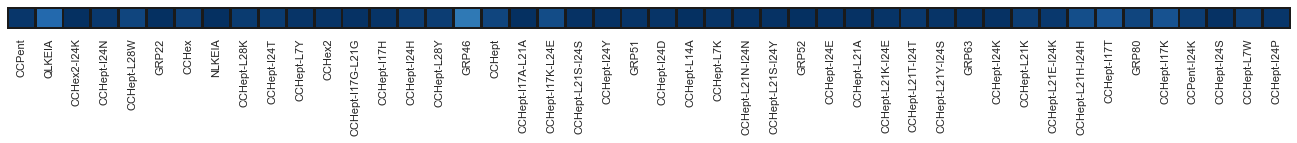

AA


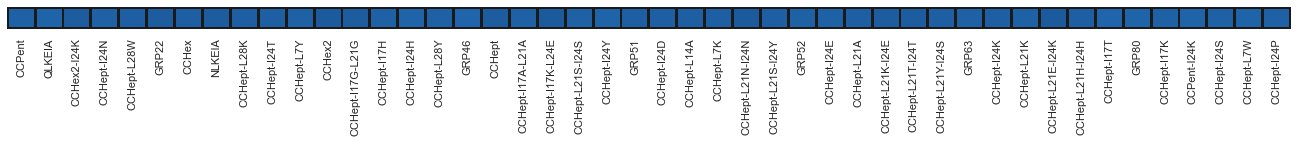

S


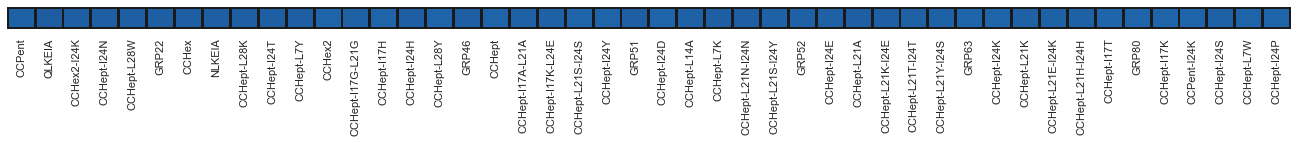

In [46]:
classes = []
for class_name in l_small_mol_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_small_mol_fluor_data_x_val = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1)
vmin = l_small_mol_fluor_data_x_val.values.min()
vmax = l_small_mol_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_small_mol_fluor_data.shape[0])
                     if l_small_mol_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_small_mol_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_small_mol_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

FA


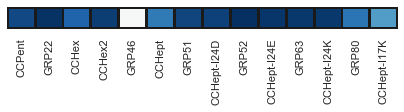

AA


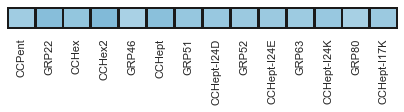

S


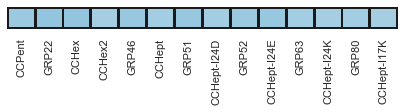

In [47]:
classes = []
for class_name in s_small_mol_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_small_mol_fluor_data_x_val = s_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1)
vmin = s_small_mol_fluor_data_x_val.values.min()
vmax = s_small_mol_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_small_mol_fluor_data.shape[0])
                     if s_small_mol_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_small_mol_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_small_mol_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

Fatty acid


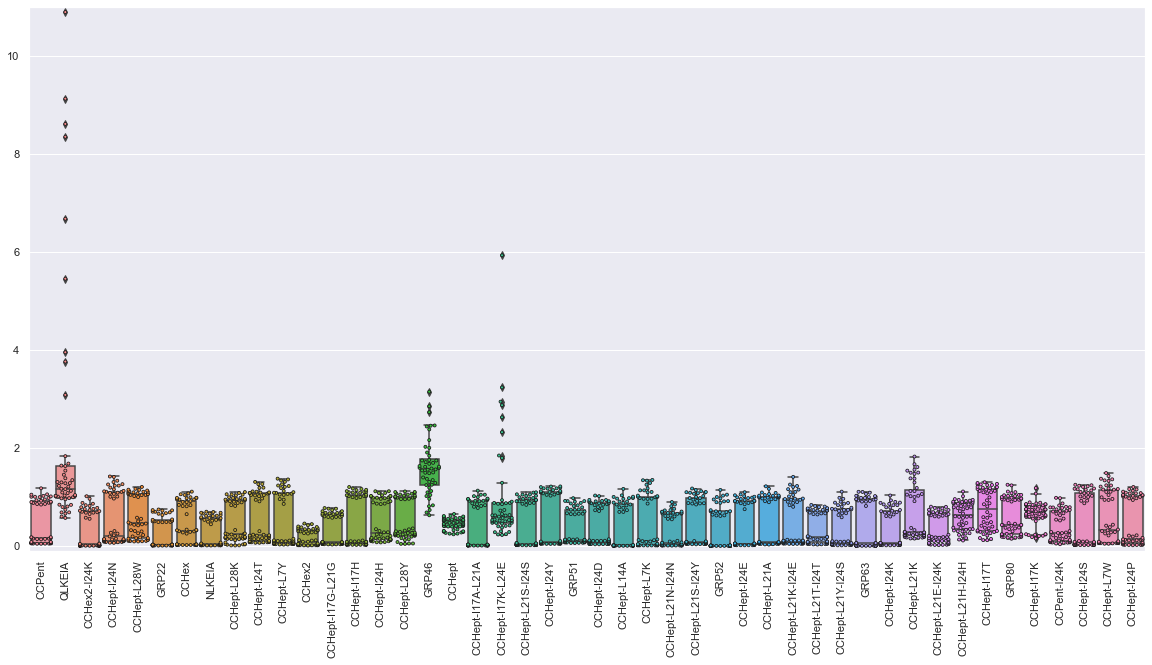

Amino acid


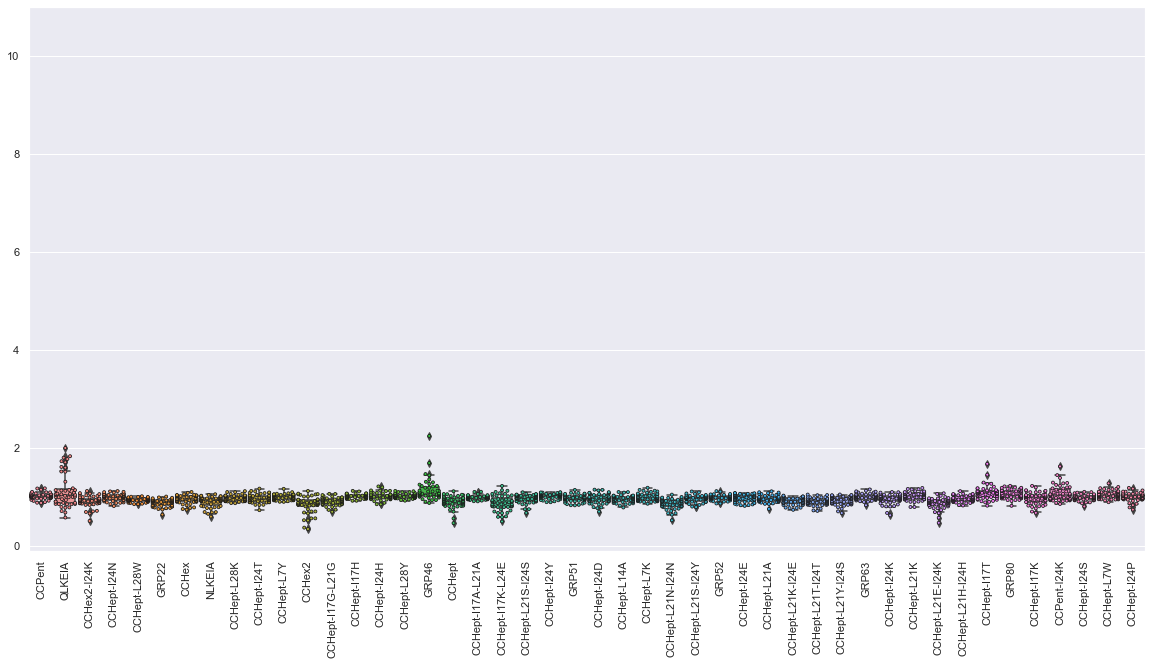

Sugars


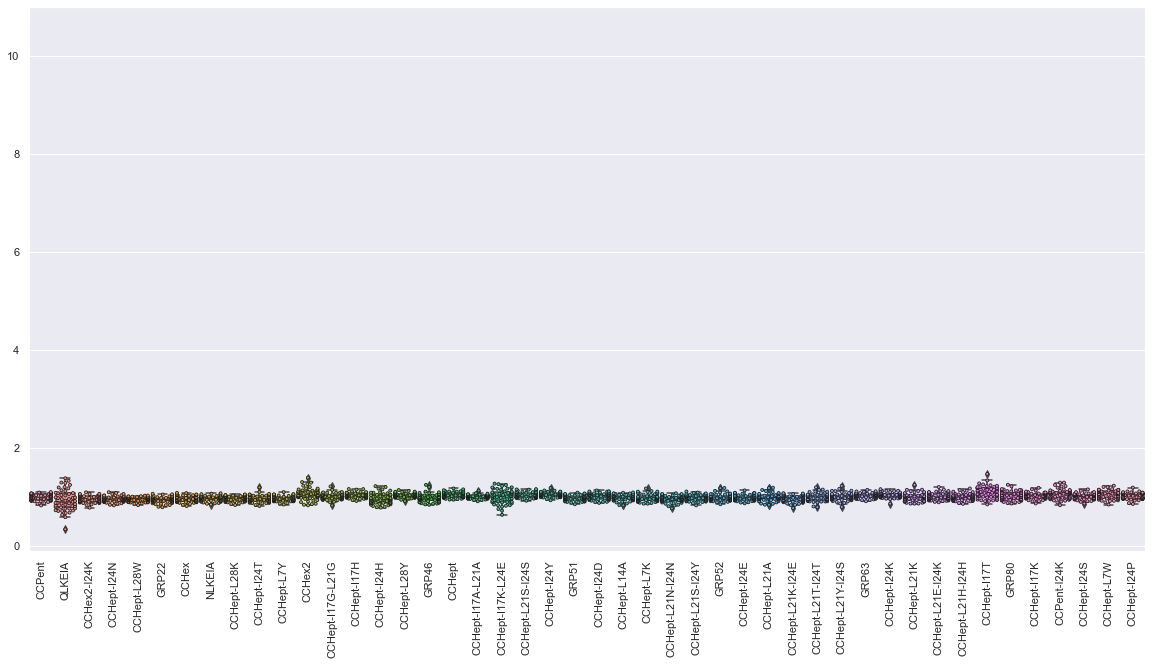

In [48]:
ymin = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).min().min() - 0.1
ymax = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).max().max() + 0.1

fa_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0])
              if l_small_mol_fluor_data['Analyte'][i] == 'FA']
aa_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0])
              if l_small_mol_fluor_data['Analyte'][i] == 'AA']
sugar_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0])
                 if l_small_mol_fluor_data['Analyte'][i] == 'S']

sns.set(rc={'figure.figsize':(20,10)})
print('Fatty acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[fa_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[fa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Amino acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[aa_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[aa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Sugars')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[sugar_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[sugar_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Fatty acid


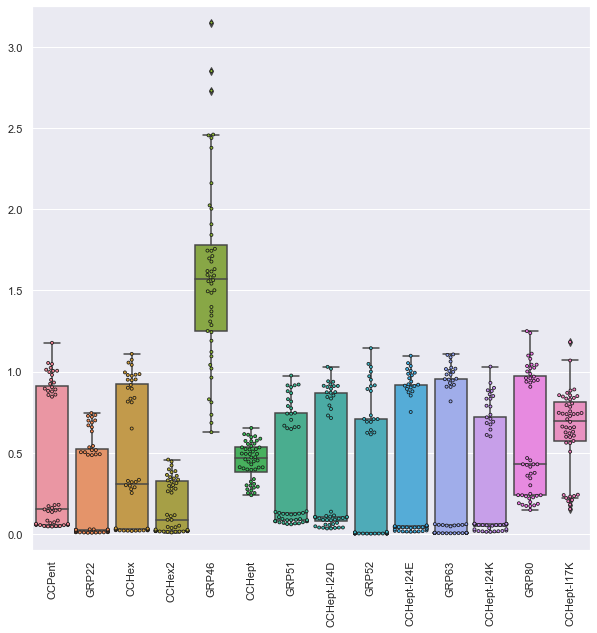

Amino acid


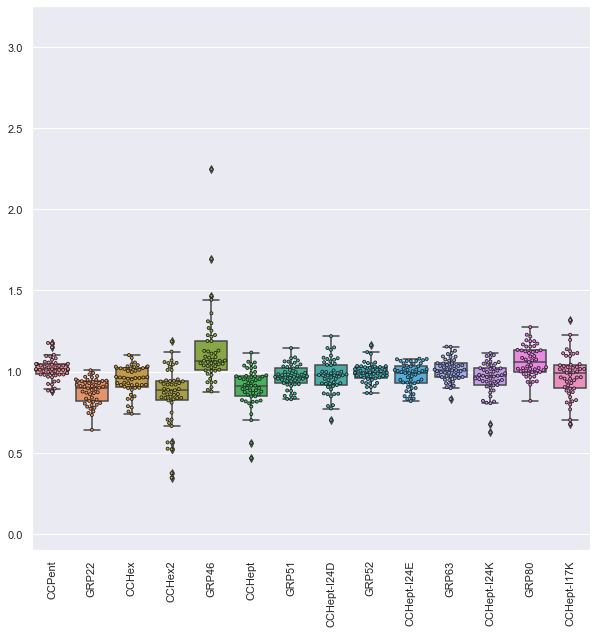

Sugars


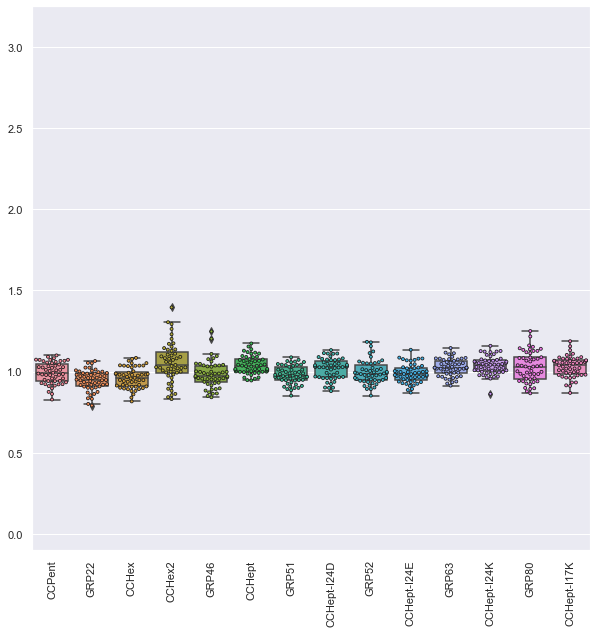

In [49]:
ymin = s_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).min().min() - 0.1
ymax = s_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).max().max() + 0.1

fa_indices = [int(i) for i in range(s_small_mol_fluor_data.shape[0])
              if s_small_mol_fluor_data['Analyte'][i] == 'FA']
aa_indices = [int(i) for i in range(s_small_mol_fluor_data.shape[0])
              if s_small_mol_fluor_data['Analyte'][i] == 'AA']
sugar_indices = [int(i) for i in range(s_small_mol_fluor_data.shape[0])
                 if s_small_mol_fluor_data['Analyte'][i] == 'S']

sns.set(rc={'figure.figsize':(10,10)})
print('Fatty acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_small_mol_fluor_data.iloc[fa_indices])
sns.swarmplot(data=s_small_mol_fluor_data.iloc[fa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Amino acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_small_mol_fluor_data.iloc[aa_indices])
sns.swarmplot(data=s_small_mol_fluor_data.iloc[aa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Sugars')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_small_mol_fluor_data.iloc[sugar_indices])
sns.swarmplot(data=s_small_mol_fluor_data.iloc[sugar_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [50]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### - Large array

First split the data into a training and test set

In [51]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/'
                'All_small_molecules/Large_array_results/',
    fluor_data=l_small_mol_fluor_data
)

In [52]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

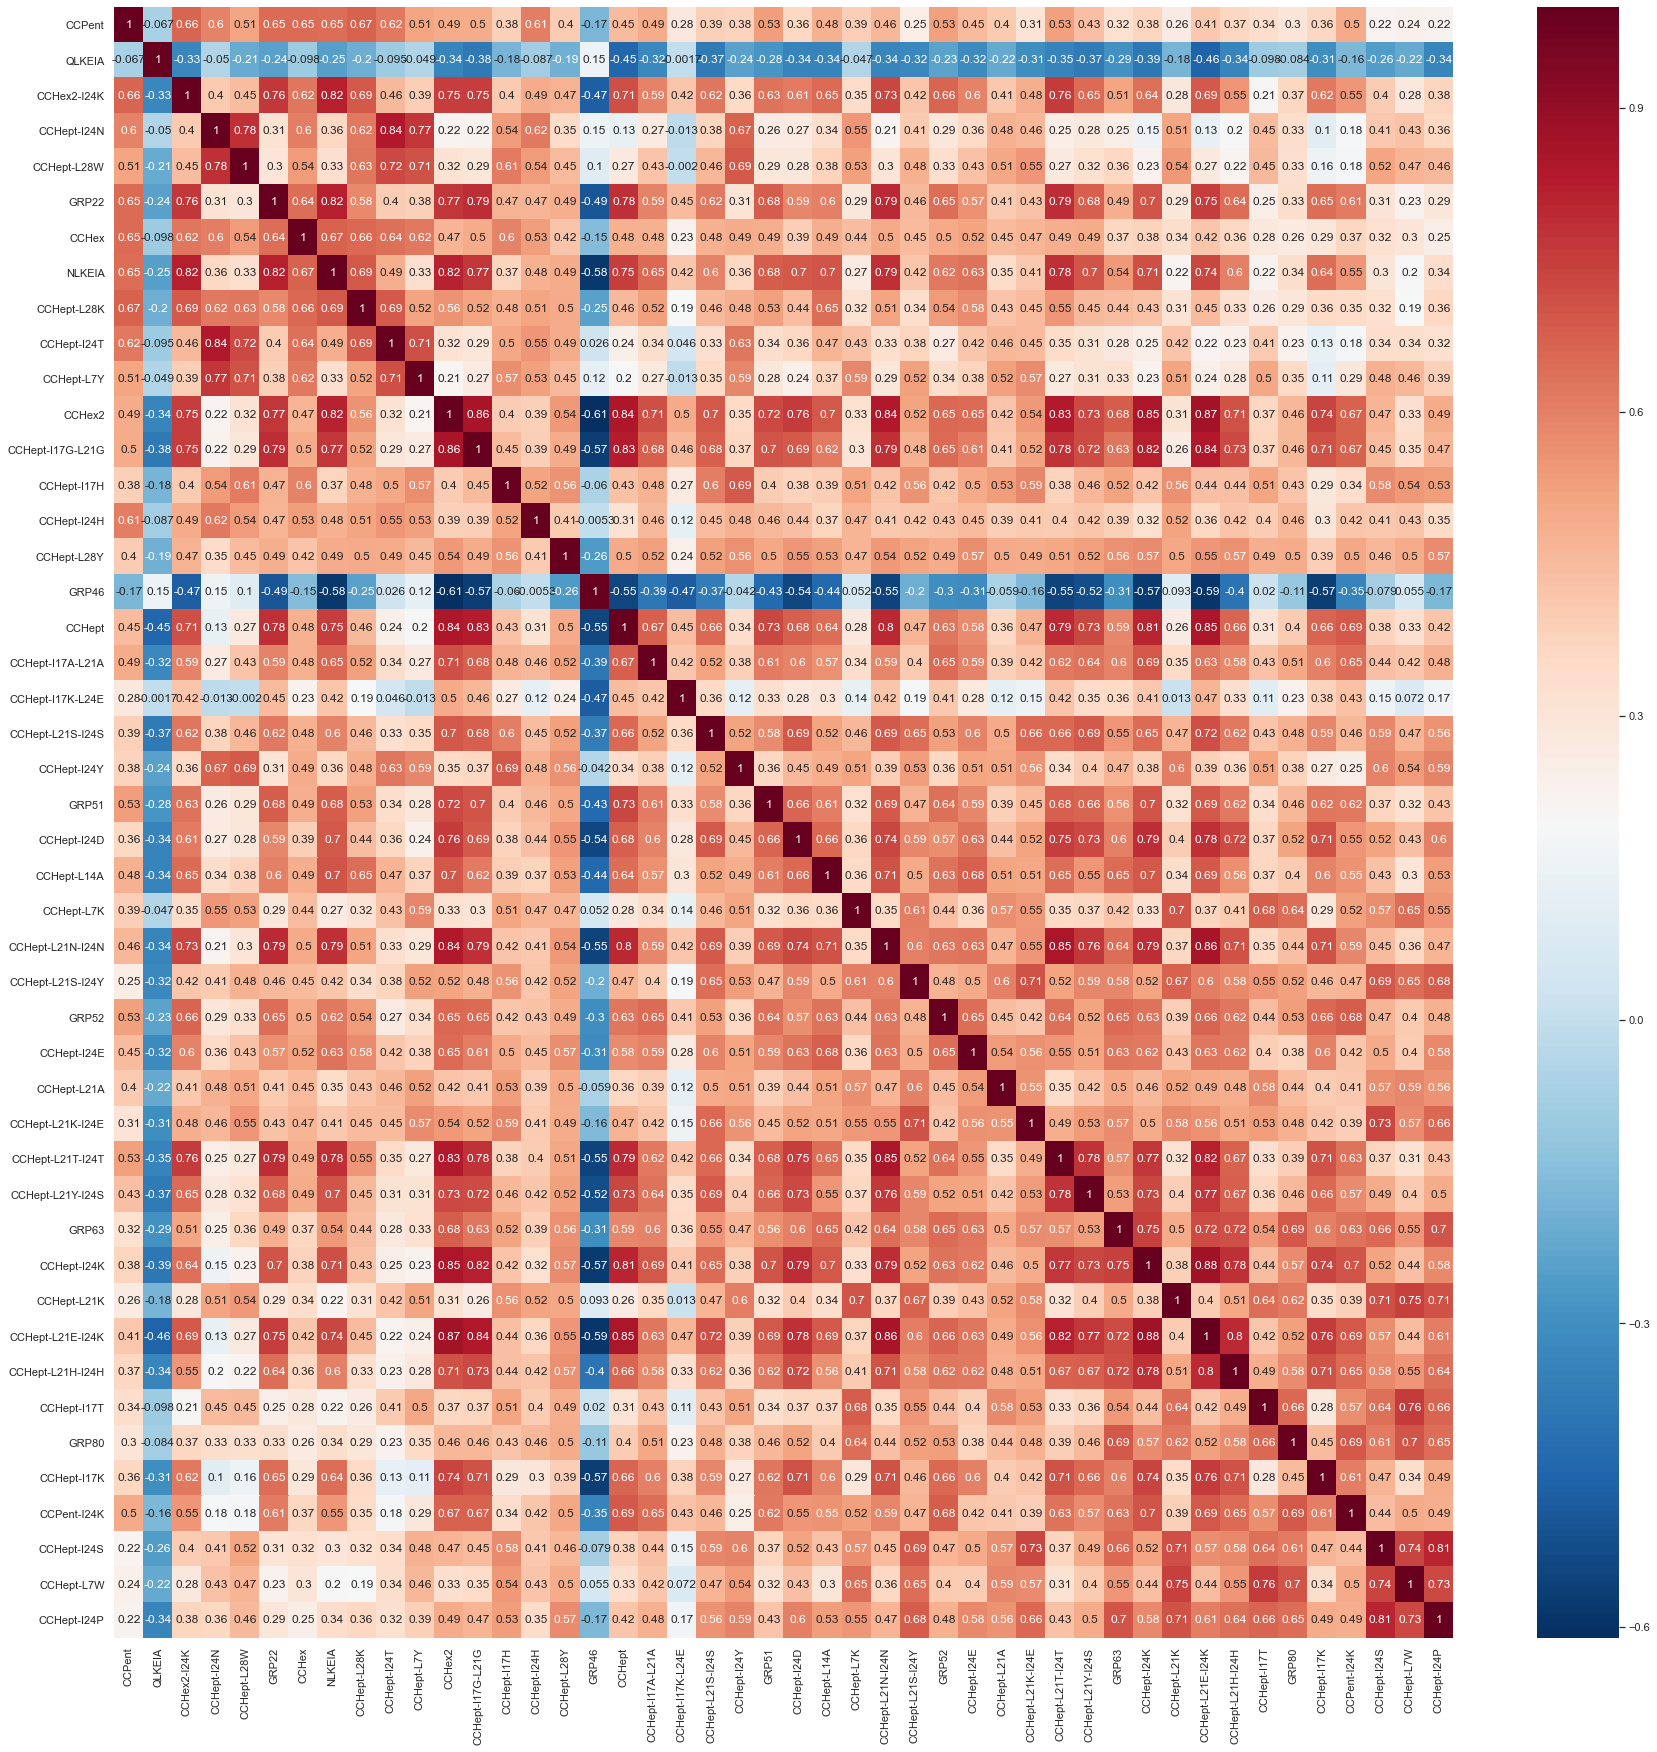

In [53]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

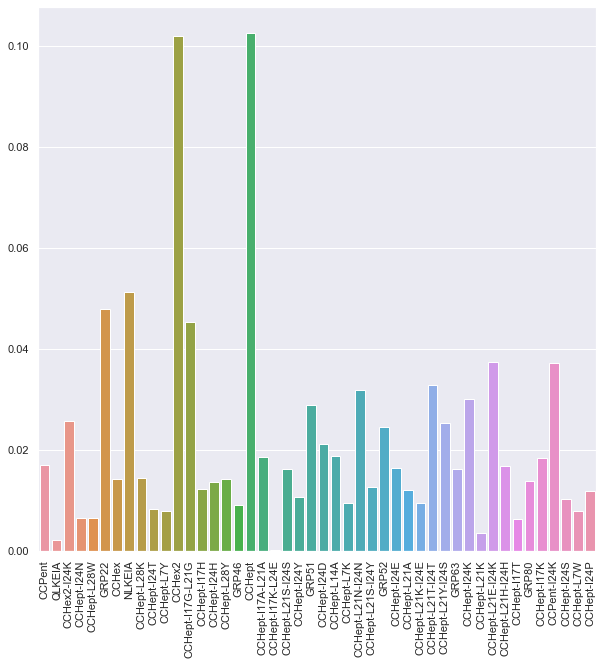

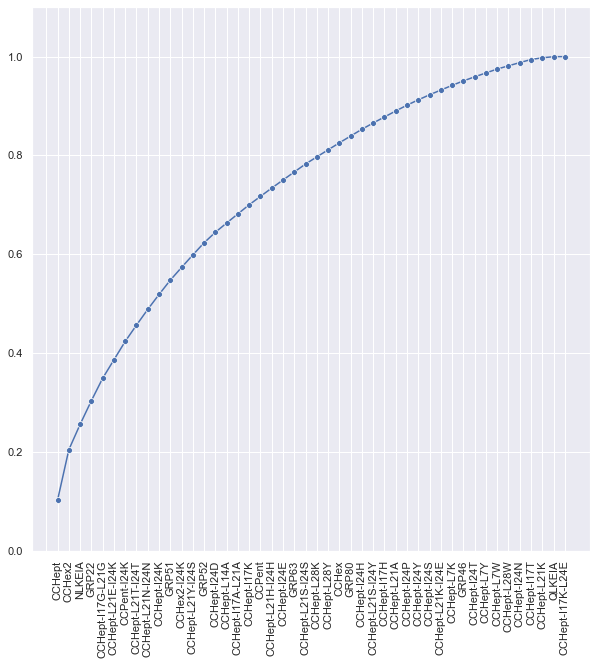

Feature     Score
0             CCHept  0.102582
1             CCHex2  0.101994
2             NLKEIA  0.051283
3              GRP22  0.047909
4   CCHept-I17G-L21G  0.045369
5   CCHept-L21E-I24K  0.037327
6        CCPent-I24K  0.037272
7   CCHept-L21T-I24T  0.032909
8   CCHept-L21N-I24N  0.031886
9        CCHept-I24K  0.030134
10             GRP51  0.028952
11       CCHex2-I24K  0.025790
12  CCHept-L21Y-I24S  0.025338
13             GRP52  0.024620
14       CCHept-I24D  0.021217
15       CCHept-L14A  0.018744
16  CCHept-I17A-L21A  0.018532
17       CCHept-I17K  0.018361
18            CCPent  0.016974
19  CCHept-L21H-I24H  0.016810
20       CCHept-I24E  0.016323
21             GRP63  0.016245
22  CCHept-L21S-I24S  0.016164
23       CCHept-L28K  0.014357
24       CCHept-L28Y  0.014274
25             CCHex  0.014200
26             GRP80  0.013745
27       CCHept-I24H  0.013711
28  CCHept-L21S-I24Y  0.012698
29       CCHept-I17H  0.012157
30       CCHept-L21A  0.012128
31       CCHept-I24P  0.011780
32       CCHept-I24Y  0.010741
33       CCHept-I24S  0.010260
34  CCHept-L21K-I24E  0.009533
35        CCHept-L7K  0.009521
36             GRP46  0.009037
37       CCHept-I24T  0.008215
38        CCHept-L7Y  0.007897
39        CCHept-L7W  0.007836
40       CCHept-L28W  0.006579
41       CCHept-I24N  0.006481
42       CCHept-I17T  0.006242
43       CCHept-L21K  0.003506
44            QLKEIA  0.002226
45  CCHept-I17K-L24E  0.000140

In [54]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

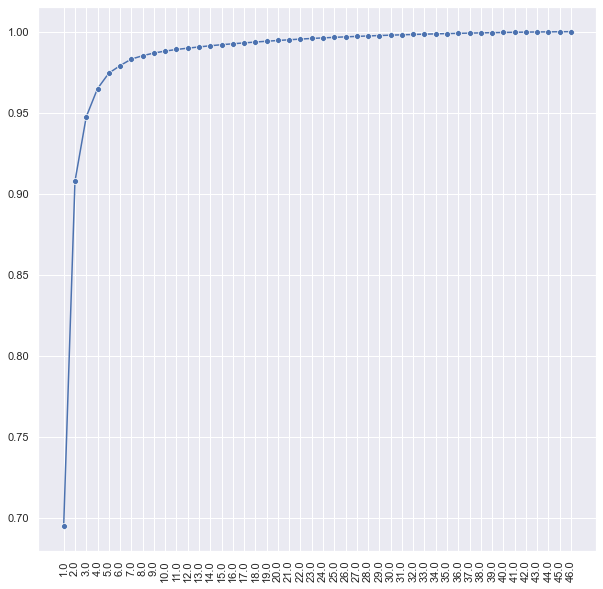

In [55]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [56]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [57]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.141198  0.426805    -0.143105    -0.134209    -0.114679   
2          0.074364  0.836725     0.064789     0.071211     0.011332   
3         -0.040672 -0.198811     0.054278    -0.172285    -0.095725   
4          0.020697 -0.261596    -0.041602     0.094447     0.028415   
5          0.075977  0.011350     0.104387    -0.074989    -0.128836   
6         -0.204353 -0.016096    -0.174057    -0.218488    -0.140314   
7          0.185179 -0.042266    -0.051808    -0.027899     0.067812   
8         -0.068504  0.020367    -0.064461    -0.105002     0.175379   
9         -0.004741  0.018230     0.048507    -0.133411    -0.155829   
10         0.055843  0.016976     0.179469     0.075119     0.133777   
11        -0.066734  0.031682     0.299602    -0.186054     0.041321   
12         0.064860 -0.013496    -0.026549    -0.148931    -0.117169   
13         0.018553 -0.003874    -0.196490     0.041641    -0.135700   
14        -0.063860  0.009221    -0.133713    -0.155136    -0.165159   
15         0.125808 -0.031619    -0.070553    -0.005990    -0.036318   
16         0.034312  0.003132     0.376419     0.024821     0.213408   
17         0.076405  0.014606    -0.090256    -0.197409     0.073883   
18        -0.216358  0.028216    -0.134315    -0.116082     0.166875   
19         0.035106  0.027986    -0.181687    -0.036456     0.192796   
20         0.113285  0.002327    -0.000159    -0.156100     0.262068   
21         0.087898 -0.014843    -0.265976     0.079356     0.075977   
22        -0.006324  0.012333    -0.096945     0.042716    -0.125717   
23         0.146144 -0.006485    -0.152745    -0.075321    -0.037494   
24         0.085436  0.008023     0.080502     0.064949    -0.087256   
25         0.274579  0.004814     0.284741     0.006586    -0.228592   
26        -0.350771  0.007334     0.117456     0.170717    -0.006975   
27         0.001022 -0.004923    -0.049734    -0.078696     0.001667   
28        -0.272833 -0.021721     0.345245    -0.201186    -0.232813   
29         0.079043 -0.006767    -0.063852     0.097657    -0.196109   
30         0.205944 -0.011656     0.076379    -0.147682    -0.101430   
31        -0.342954 -0.020347     0.155832     0.092689    -0.004172   
32         0.221034  0.006572    -0.008282     0.231742    -0.071154   
33        -0.112495 -0.008941    -0.107965     0.060480    -0.304329   
34         0.230662  0.000287    -0.072702     0.002206    -0.052280   
35         0.095364  0.000140    -0.096971     0.286020    -0.081062   
36         0.046223  0.005461     0.015395     0.030307     0.168926   
37         0.248100  0.005202     0.266615    -0.027730     0.034264   
38         0.119370 -0.009514    -0.002813     0.176133    -0.054381   
39         0.003966 -0.003034    -0.057693     0.007479    -0.015148   
40        -0.177268 -0.005607    -0.015070     0.024997    -0.257908   
41        -0.103875 -0.017938     0.182657     0.421024     0.034783   
42        -0.131199 -0.005158    -0.155895     0.129640    -0.031026   
43         0.165412 -0.006988     0.053890    -0.049205    -0.306499   
44        -0.089220  0.006846    -0.092224     0.354180     0.089462   
45         0.015319  0.000539     0.022905     0.216934    -0.336512   
46         0.116911 -0.007999    -0.060381    -0.113803    -0.078471   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.136399 -0.128171 -0.138913    -0.130024    -0.131371  ...   
2          0.063803  0.091693  0.065563     0.067791     0.064676  ...   
3          0.110412 -0.034955  0.135084    -0.032402    -0.110853  ...   
4         -0.098339  0.051667 -0.105679    -0.005416     0.045678  ...   
5          0.180653  0.035978  0.160761    -0.043613    -0.039040  ...   
6         -0.110159 -0.251091 -0.14738

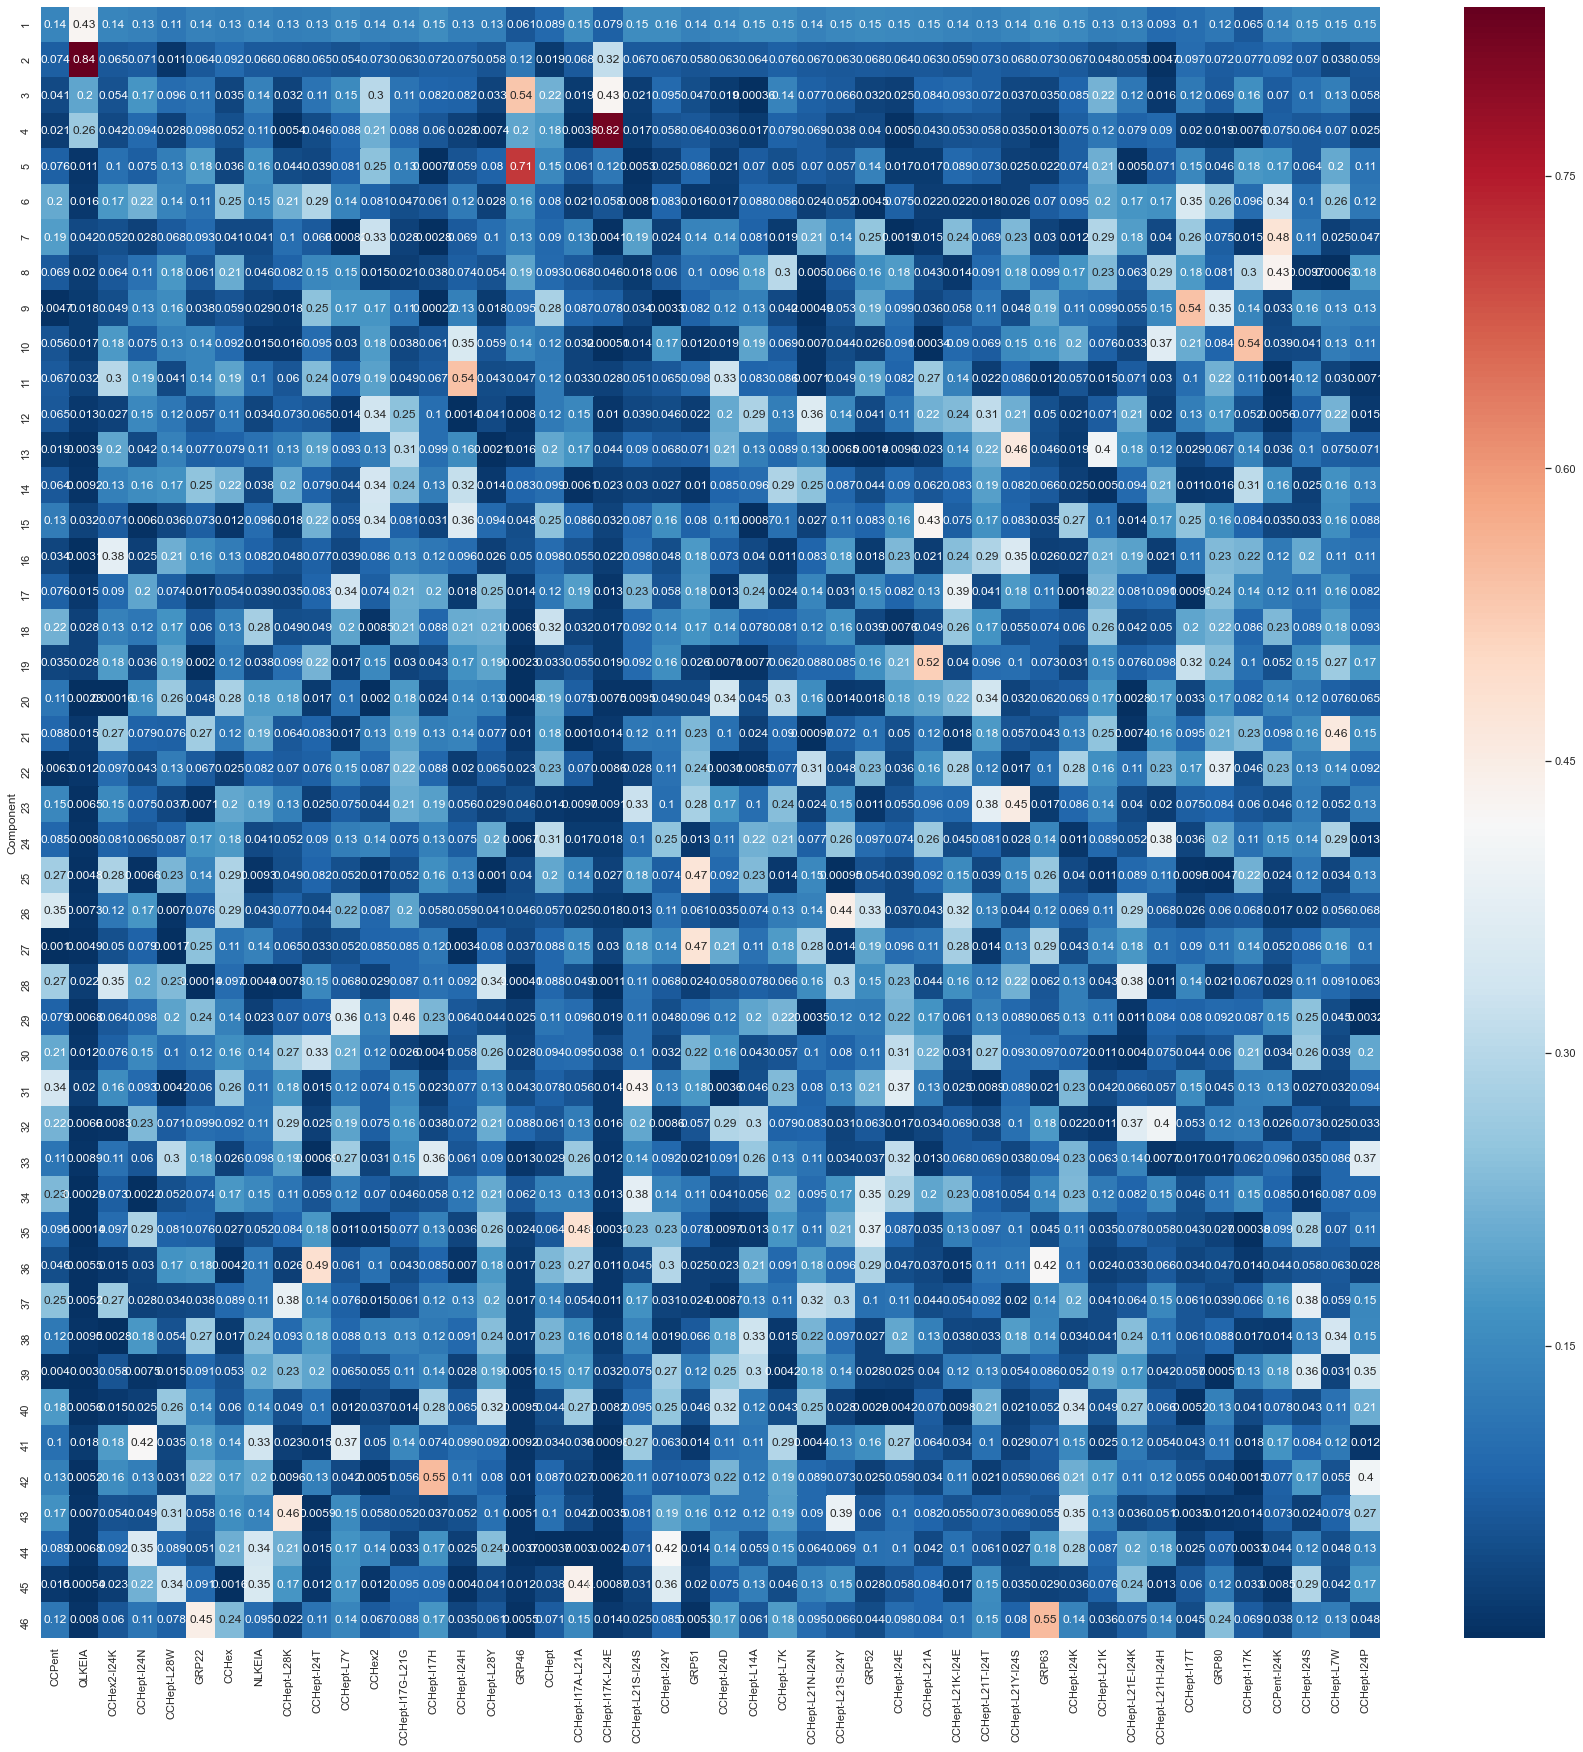

In [59]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [60]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [61]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.026070  0.191835     0.026813     0.025015     0.020960   
2          0.013730  0.376081     0.012140     0.013273     0.002071   
3          0.007509  0.089359     0.010170     0.032112     0.017496   
4          0.003821  0.117579     0.007795     0.017604     0.005194   
5          0.014028  0.005101     0.019559     0.013977     0.023548   
6          0.037730  0.007235     0.032613     0.040724     0.025646   
7          0.034190  0.018997     0.009707     0.005200     0.012394   
8          0.012648  0.009154     0.012078     0.019571     0.032055   
9          0.000875  0.008194     0.009089     0.024866     0.028482   
10         0.010310  0.007630     0.033627     0.014001     0.024451   
11         0.012321  0.014240     0.056136     0.034678     0.007552   
12         0.011975  0.006066     0.004974     0.027759     0.021416   
13         0.003425  0.001741     0.036816     0.007761     0.024803   
14         0.011791  0.004144     0.025054     0.028916     0.030187   
15         0.023228  0.014212     0.013219     0.001116     0.006638   
16         0.006335  0.001408     0.070529     0.004626     0.039006   
17         0.014107  0.006565     0.016911     0.036795     0.013504   
18         0.039947  0.012682     0.025166     0.021636     0.030501   
19         0.006482  0.012579     0.034042     0.006795     0.035238   
20         0.020916  0.001046     0.000030     0.029095     0.047899   
21         0.016229  0.006671     0.049836     0.014791     0.013887   
22         0.001168  0.005543     0.018164     0.007962     0.022978   
23         0.026983  0.002915     0.028620     0.014039     0.006853   
24         0.015774  0.003606     0.015083     0.012106     0.015948   
25         0.050696  0.002164     0.053352     0.001227     0.041781   
26         0.064764  0.003296     0.022008     0.031820     0.001275   
27         0.000189  0.002213     0.009319     0.014668     0.000305   
28         0.050374  0.009763     0.064688     0.037499     0.042552   
29         0.014594  0.003041     0.011964     0.018202     0.035844   
30         0.038024  0.005239     0.014311     0.027526     0.018539   
31         0.063320  0.009145     0.029198     0.017276     0.000763   
32         0.040810  0.002954     0.001552     0.043194     0.013005   
33         0.020770  0.004019     0.020229     0.011273     0.055624   
34         0.042588  0.000129     0.013622     0.000411     0.009555   
35         0.017607  0.000063     0.018169     0.053311     0.014816   
36         0.008534  0.002455     0.002884     0.005649     0.030875   
37         0.045807  0.002338     0.049955     0.005169     0.006263   
38         0.022039  0.004276     0.000527     0.032829     0.009940   
39         0.000732  0.001364     0.010810     0.001394     0.002769   
40         0.032729  0.002520     0.002824     0.004659     0.047139   
41         0.019179  0.008063     0.034224     0.078474     0.006357   
42         0.024224  0.002318     0.029210     0.024163     0.005671   
43         0.030540  0.003141     0.010097     0.009171     0.056020   
44         0.016473  0.003077     0.017280     0.066015     0.016351   
45         0.002828  0.000242     0.004292     0.040434     0.061506   
46         0.021585  0.003595     0.011313     0.021212     0.014343   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.024800  0.022689  0.025157     0.025977     0.025625  ...   
2          0.011600  0.016231  0.011873     0.013544     0.012616  ...   
3          0.020075  0.006188  0.024463     0.006474     0.021623  ...   
4          0.017880  0.009146  0.019138     0.001082     0.008910  ...   
5          0.032846  0.006369  0.029113     0.008713     0.007615  ...   
6          0.020029  0.044448  0.02669

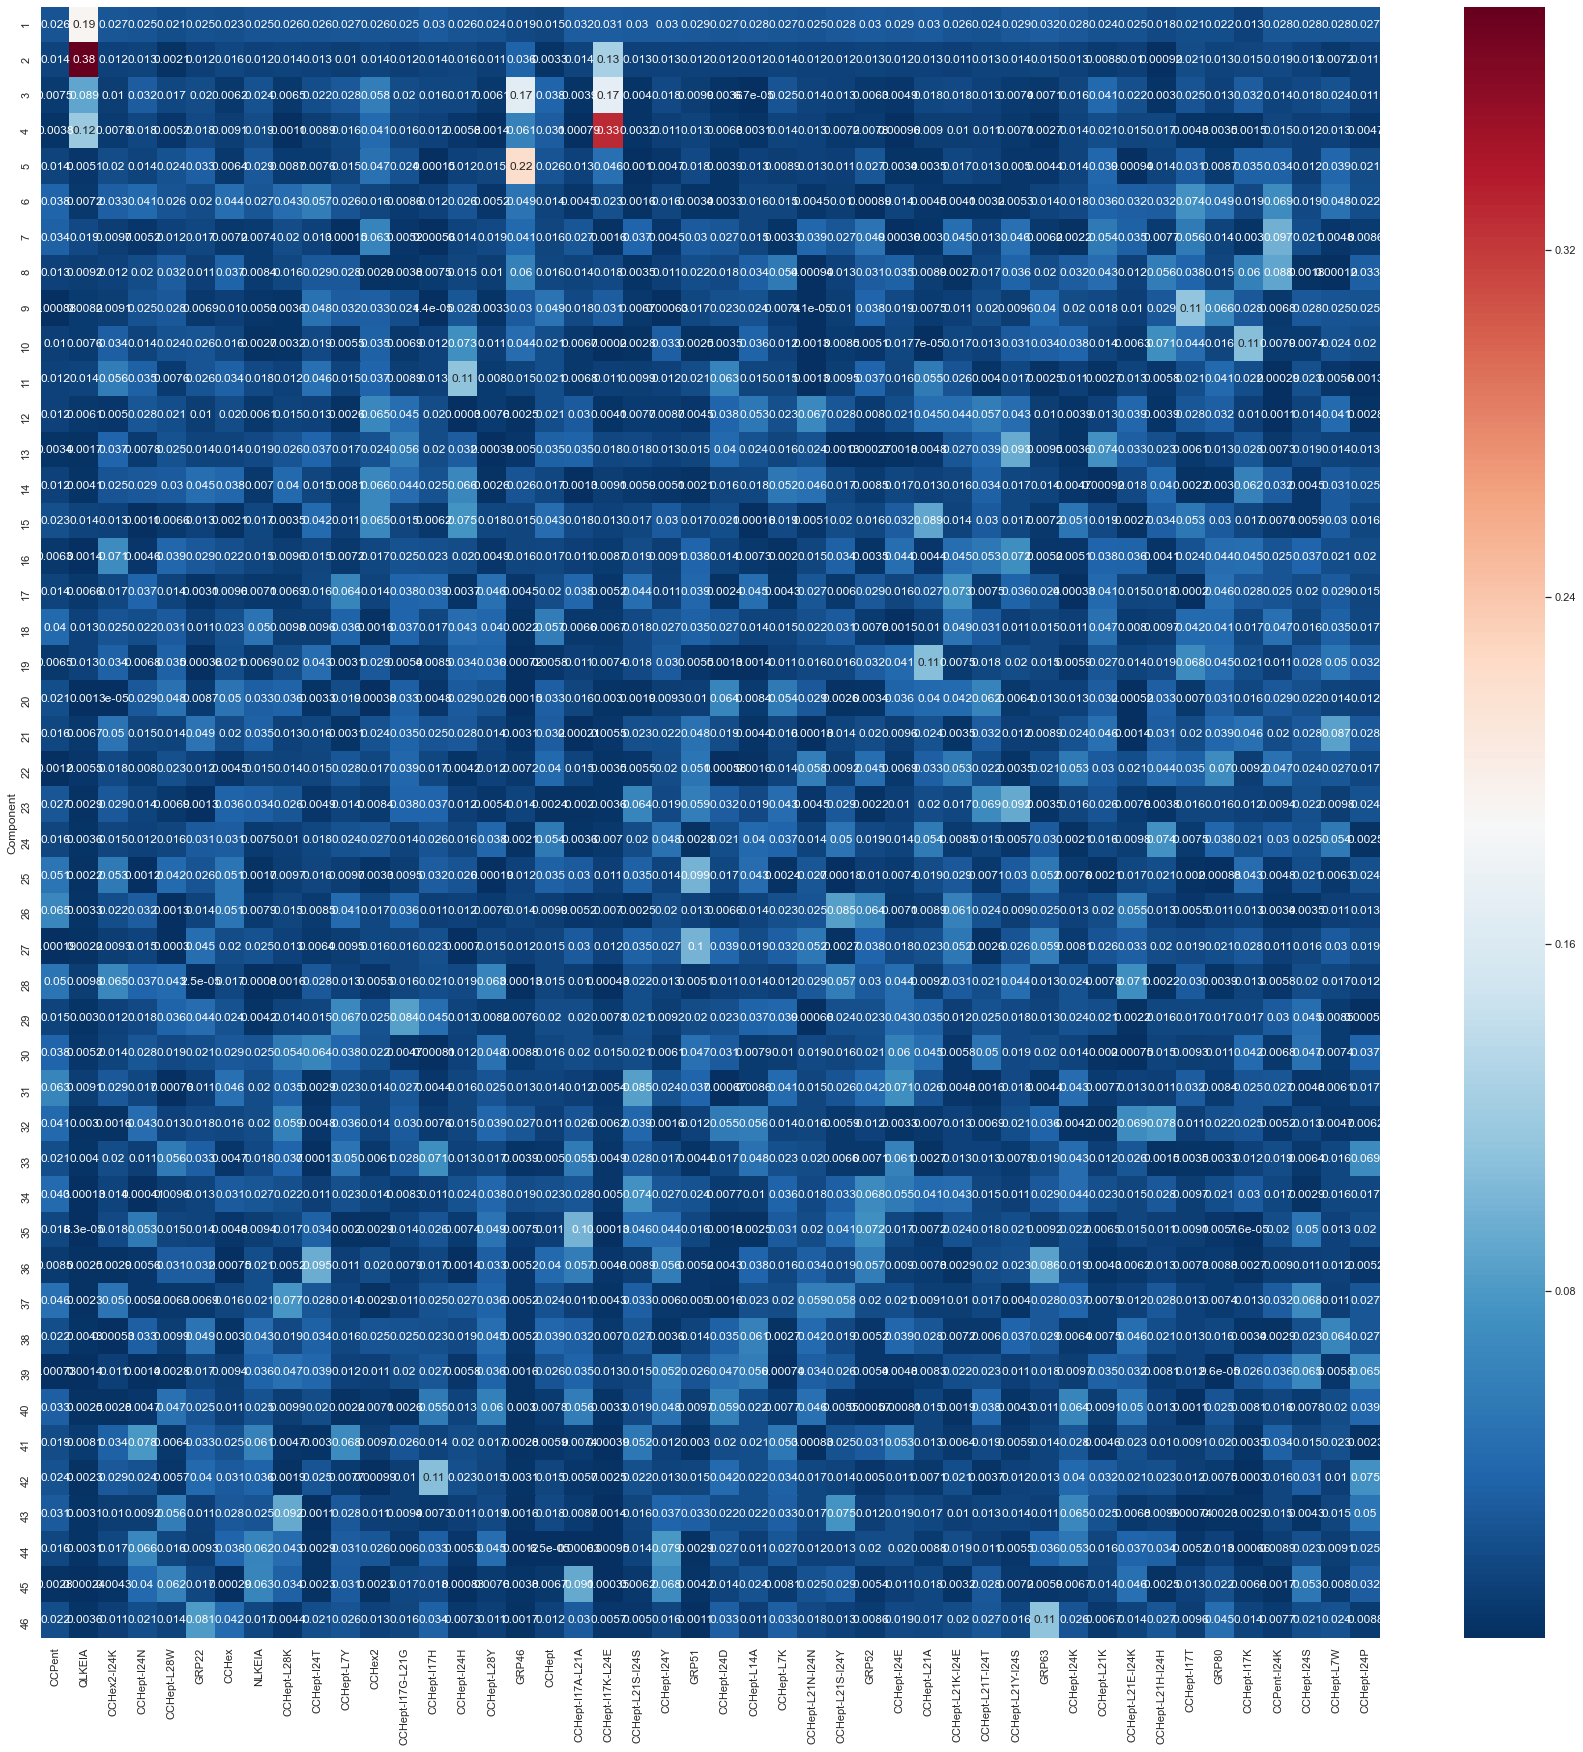

In [62]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Scatter plots of data transformed to PCA dimensions

In [63]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

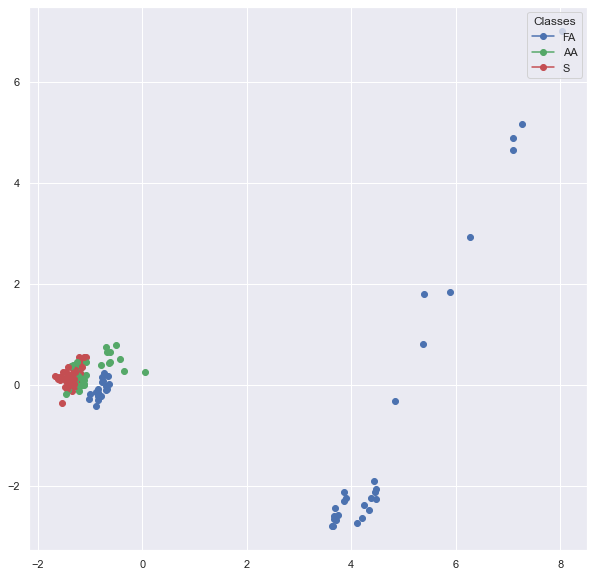

In [64]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['FA', 'AA', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_2D'
)

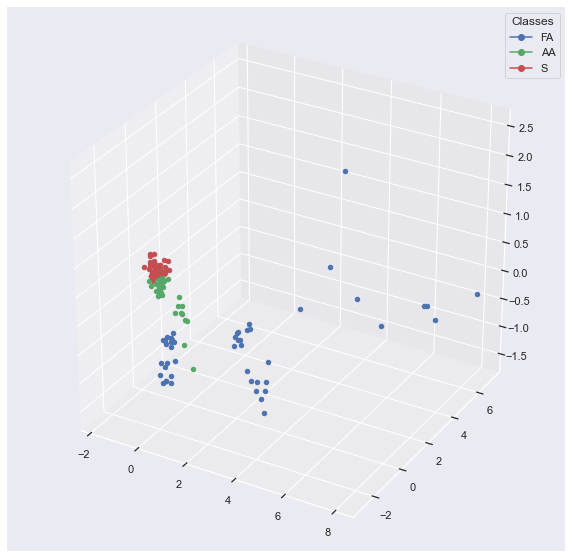

In [65]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['FA', 'AA', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_3D'
)

~95% of the variation in the data can be accounted for with 3 features, but to compare how well the model can be trained on the signal from the two different array sizes will not perform PCA.

In [66]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [67]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 0.8873540185304891


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 100000.0}
Best score: 0.8914610770493123
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31622.776601683792}
Best score: 0.8789978213507625
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1000.0}
Best score: 0.8821681047996839


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10000.0}
Best score: 0.9038818262347673






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 0.8873540185304891
All parameter combinations tested:
1 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.001} 0.495
2 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10.0} 0.878
3 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 9}
Best score: 0.8961834135363546
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 23}
Best score: 0.8538702147525676
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 8}
Best score: 0.8777134074502497
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 12}
Best score: 0.853635231870526
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNei

Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.7971043988691048
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.7970601717970138






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.7958703256381274
All parameter combinations tested:
1 {} 0.796






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.7843383975272521
All parameter combinations tested:
1 {} 0.784






GaussianNB: smote
Best parameters: {}
Best score: 0.8153139876978885
All parameter combinations tested:
1 {} 0.815






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.7971043988691048
All parameter combinations tested:
1 {} 0.797






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.7970601717970138
All parameter combinations tested:
1 {} 0.797
Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.25}
Best score: 0.8971142789099446
Randomised search with cross-validation results:
Best

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.00017263349150062197, 'SVC__C': 256.0}
Best score: 0.8945297948239125






SVC: no_balancing
Best parameters: {'SVC__gamma': 0.0078125, 'SVC__C': 256.0}
Best score: 0.8959673757042179
All parameter combinations tested:
1 {'SVC__gamma': 0.0078125, 'SVC__C': 256.0} 0.896
2 {'SVC__gamma': 0.005524271728019903, 'SVC__C': 128.0} 0.879
3 {'SVC__gamma': 0.005524271728019903, 'SVC__C': 0.7071067811865476} 0.545
4 {'SVC__gamma': 0.0013810679320049757, 'SVC__C': 2.0} 0.473
5 {'SVC__gamma': 2.8284271247461903, 'SVC__C': 2.8284271247461903} 0.419
6 {'SVC__gamma': 0.005524271728019903, 'SVC__C': 2.8284271247461903} 0.777
7 {'SVC__gamma': 0.02209708691207961, 'SVC__C': 5.656854249492381} 0.885
8 {'SVC__gamma': 0.0009765625, 'SVC__C': 16.0} 0.787
9 {'SVC__gamma': 0.0625, 'SVC__C': 2.8284271247461903} 0.885
10 {'SVC__gamma': 0.00034526698300124393, 'SVC__C': 90.50966799187809} 0.852
11 {'SVC__gamma': 0.0009765625, 'SVC

In [68]:
score_df

Algorithm Resampling_method  \
0     LogisticRegression      no_balancing   
1     LogisticRegression      max_sampling   
2     LogisticRegression             smote   
3     LogisticRegression          smoteenn   
4     LogisticRegression        smotetomek   
5   KNeighborsClassifier      no_balancing   
6   KNeighborsClassifier      max_sampling   
7   KNeighborsClassifier             smote   
8   KNeighborsClassifier          smoteenn   
9   KNeighborsClassifier        smotetomek   
10            GaussianNB      no_balancing   
11            GaussianNB      max_sampling   
12            GaussianNB             smote   
13            GaussianNB          smoteenn   
14            GaussianNB        smotetomek   
15             LinearSVC      no_balancing   
16             LinearSVC      max_sampling   
17             LinearSVC             smote   
18             LinearSVC          smoteenn   
19             LinearSVC        smotetomek   
20                   SVC      no_balancing   
21                   SVC      max_sampling   
22                   SVC             smote   
23                   SVC          smoteenn   
24                   SVC        smotetomek   

                                          Best_params  Best_f1_score  \
0   {'LogisticRegression__solver': 'saga', 'Logist...       0.887354   
1   {'LogisticRegression__solver': 'saga', 'Logist...       0.891461   
2   {'LogisticRegression__solver': 'saga', 'Logist...       0.878998   
3   {'LogisticRegression__solver': 'newton-cg', 'L...       0.882168   
4   {'LogisticRegression__solver': 'sag', 'Logisti...       0.903882   
5   {'KNeighborsClassifier__weights': 'distance', ...       0.896183   
6   {'KNeighborsClassifier__weights': 'distance', ...       0.853870   
7   {'KNeighborsClassifier__weights': 'distance', ...       0.877713   
8   {'KNeighborsClassifier__weights': 'distance', ...       0.853635   
9   {'KNeighborsClassifier__weights': 'distance', ...       0.868574   
10                                                 {}       0.795870   
11                                                 {}       0.784338   
12                                                 {}       0.815314   
13                                                 {}       0.797104   
14                                                 {}       0.797060   
15                             {'LinearSVC__C': 0.25}       0.897114   
16               {'LinearSVC__C': 0.1767766952966369}       0.882509   
17                           {'LinearSVC__C': 0.0625}       0.885829   
18                            {'LinearSVC__C': 0.125}       0.879049   
19                            {'LinearSVC__C': 0.125}       0.858705   
20         {'SVC__gamma': 0.0078125, 'SVC__C': 256.0}       0.895967   
21  {'SVC__gamma': 0.0006905339660024879, 'SVC__C'...       0.885576   
22  {'SVC__gamma': 0.08838834764831845, 'SVC__C': ...       0.905331   
23  {'SVC__gamma': 0.00017263349150062197, 'SVC__C...       0.895935   
24  {'SVC__gamma': 0.00017263349150062197, 'SVC__C...       0.894530   

    Mean_f1_score  Std_dev_f1_score  
0        0.821356          0.055725  
1        0.779496          0.074312  
2        0.716883          0.064505  
3        0.757278          0.065008  
4        0.791699          0.049599  
5        0.842755          0.067693  
6        0.817566          0.090080  
7        0.830817          0.057403  
8        0.762485          0.083679  
9        0.832496          0.048098  
10       0.795870          0.069030  
11       0.784338          0.136083  
12       0.815314          0.086065  
13       0.797104          0.085825  
14       0.797060          0.063564  
15       0.795561          0.080834  
16       0.804668          0.071815  
17       0.839188          0.042491  
18       0.826100          0.059072  
19       0.781134          0.059588  
20       0.677672          0.050099  
21       0.712448          0.050171  
22       0.716915          0.050181  
23       0.561328          0.0505

So, from this spot check, **support vector classifier with radial basis function  kernel**, with class rebalancing using **SMOTE** does a good job.

So, run hyperparameter optimisation for SVC with SMOTE.

In [69]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)  # Actual number of x samples
# will be different owing to oversampling, but don't want to hard code this selection into the pipeline, so for
# now this estimate will do to define the ranges of values to test for some of the hyperparameter values

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='random search', fixed_params=fixed_params, tuned_params=random_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.0013810679320049757, 'SVC__C': 45.254833995939045}
Best score: 0.9211369676075558


In [70]:
grid_tuned_params = {'gamma': np.linspace(0.0001, 0.01, 100),
                     'C': np.linspace(1, 100, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='grid search', fixed_params=fixed_params, tuned_params=grid_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 17.0, 'SVC__gamma': 0.0093}
Best score: 0.9223218176159353


### So, optimal hyperparameter combination:
- C = 17
- gamma = 0.0093

Model cross-validation score: [0.79084967 0.91071429 0.90740741 0.91055089 0.73333333]
accuracy_score: 0.9285714285714286
recall_score: 0.9259259259259259
precision_score: 0.9259259259259259
f1_score: 0.9259259259259259
cohen_kappa_score: 0.89272030651341
None


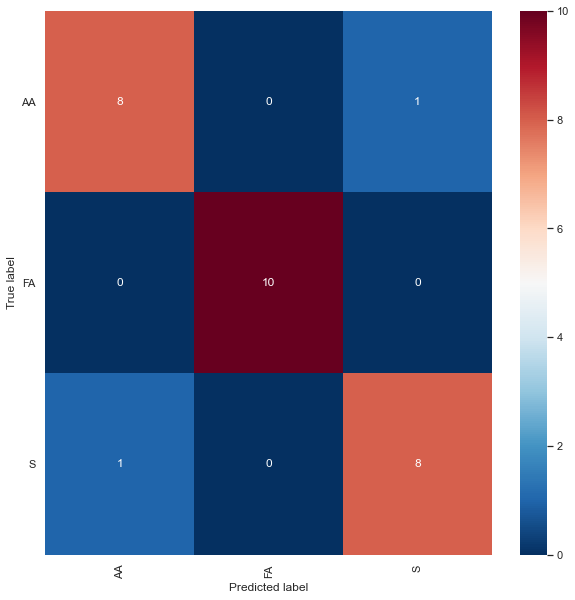

true


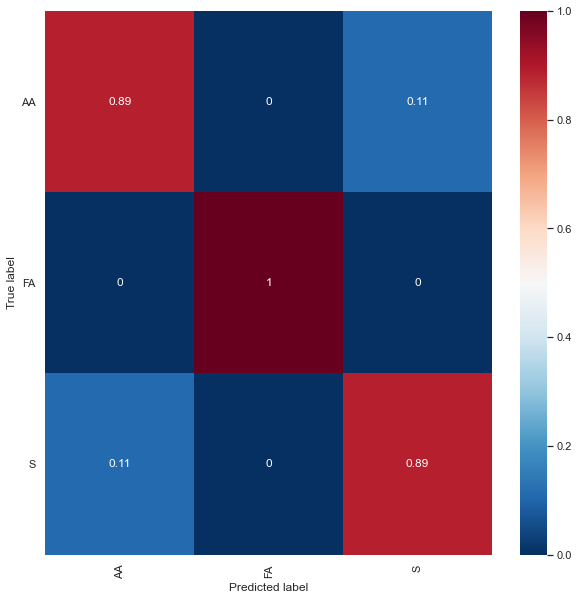

pred


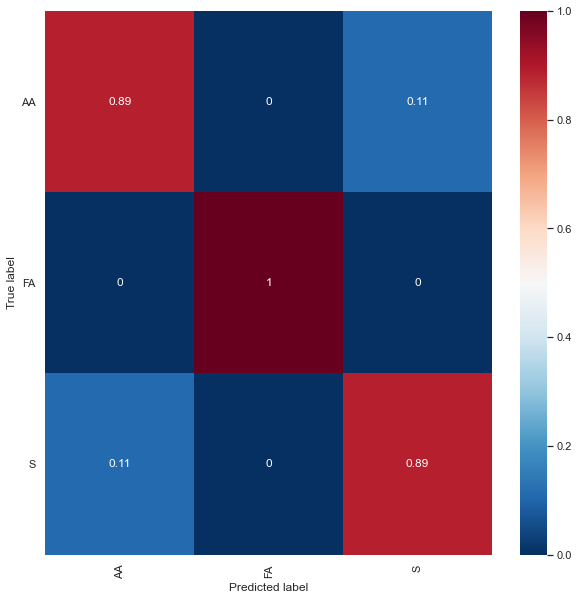

In [71]:
final_params = {'C': 17,
                'gamma': 0.0093}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='train', fixed_params=fixed_params, tuned_params=final_params,
    train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs, resampling_method=['smote'],
    n_iter=n_iter, cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

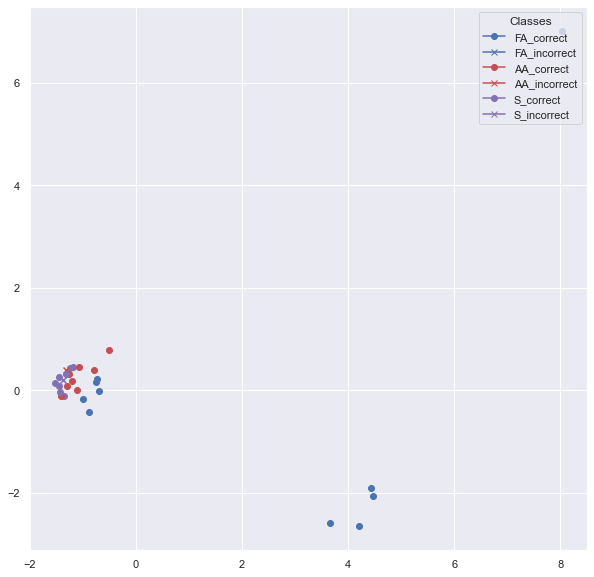

In [72]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['FA_correct', 'FA_incorrect', 'AA_correct', 'AA_incorrect', 'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

#### - Standard array

In [84]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [76]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/'
                'All_small_molecules/Standard_array_results/',
    fluor_data=s_small_mol_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/All_small_molecules/Standard_array_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/All_small_molecules/Standard_array_results/?y


In [77]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

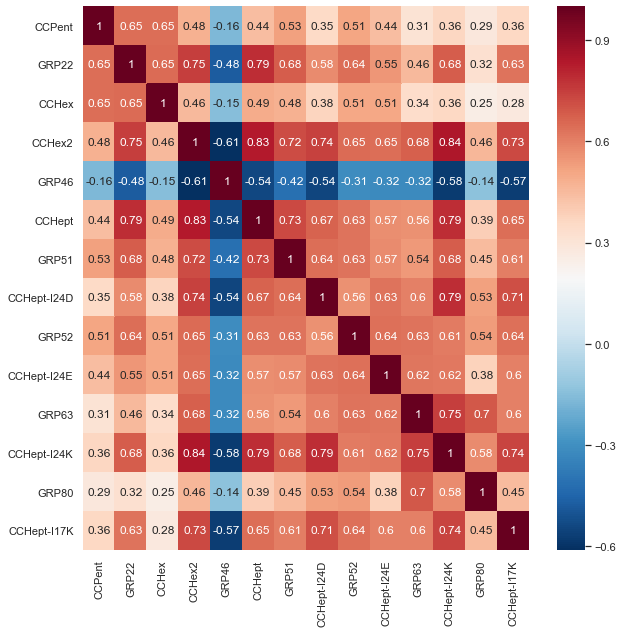

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
CCPent       1.000000  0.645747  0.646669  0.479150 -0.164803  0.444726   
GRP22        0.645747  1.000000  0.650179  0.752223 -0.478084  0.788075   
CCHex        0.646669  0.650179  1.000000  0.455353 -0.146760  0.493015   
CCHex2       0.479150  0.752223  0.455353  1.000000 -0.610976  0.833863   
GRP46       -0.164803 -0.478084 -0.146760 -0.610976  1.000000 -0.537182   
CCHept       0.444726  0.788075  0.493015  0.833863 -0.537182  1.000000   
GRP51        0.527276  0.682748  0.483510  0.718502 -0.415424  0.726277   
CCHept-I24D  0.352420  0.576000  0.375764  0.744169 -0.542981  0.666722   
GRP52        0.512410  0.641822  0.505527  0.651373 -0.310112  0.629782   
CCHept-I24E  0.440600  0.551308  0.505149  0.646960 -0.319304  0.567851   
GRP63        0.309005  0.457593  0.341771  0.676465 -0.315325  0.562841   
CCHept-I24K  0.364944  0.679831  0.358771  0.843648 -0.578950  0.791445   
GRP80        0.288253  0.322084  0.251766  0.461205 -0.137768  0.393807   
CCHept-I17K  0.360301  0.629922  0.278026  0.729174 -0.568127  0.647421   

                GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
CCPent       0.527276     0.352420  0.512410     0.440600  0.309005   
GRP22        0.682748     0.576000  0.641822     0.551308  0.457593   
CCHex        0.483510     0.375764  0.505527     0.505149  0.341771   
CCHex2       0.718502     0.744169  0.651373     0.646960  0.676465   
GRP46       -0.415424    -0.542981 -0.310112    -0.319304 -0.315325   
CCHept       0.726277     0.666722  0.629782     0.567851  0.562841   
GRP51        1.000000     0.644055  0.630519     0.572143  0.544806   
CCHept-I24D  0.644055     1.000000  0.563401     0.632513  0.600397   
GRP52        0.630519     0.563401  1.000000     0.639661  0.630001   
CCHept-I24E  0.572143     0.632513  0.639661     1.000000  0.624198   
GRP63        0.544806     0.600397  0.630001     0.624198  1.000000   
CCHept-I24K  0.683651     0.786447  0.614991     0.616654  0.749314   
GRP80        0.446751     0.527035  0.536090     0.382795  0.695030   
CCHept-I17K  0.608875     0.712385  0.636862     0.600764  0.603374   

             CCHept-I24K     GRP80  CCHept-I17K  
CCPent          0.364944  0.288253     0.360301  
GRP22           0.679831  0.322084     0.629922  
CCHex           0.358771  0.251766     0.278026  
CCHex2          0.843648  0.461205     0.729174  
GRP46          -0.578950 -0.137768    -0.568127  
CCHept          0.791445  0.393807     0.647421  
GRP51           0.683651  0.446751     0.608875  
CCHept-I24D     0.786447  0.527035     0.712385  
GRP52           0.614991  0.536090     0.636862  
CCHept-I24E     0.616654  0.382795     0.600764  
GRP63           0.749314  0.695030     0.603374  
CCHept-I24K     1.000000  0.576986     0.740210  
GRP80           0.576986  1.000000     0.448666  
CCHept-I17K     0.740210  0.448666     1.000000

In [78]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

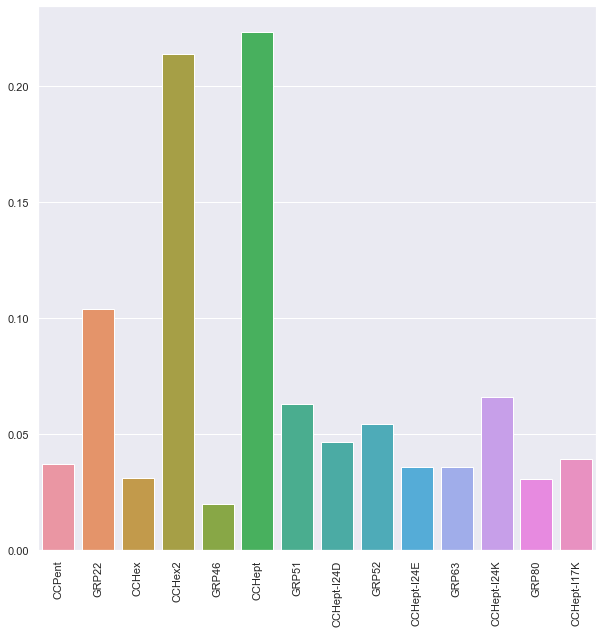

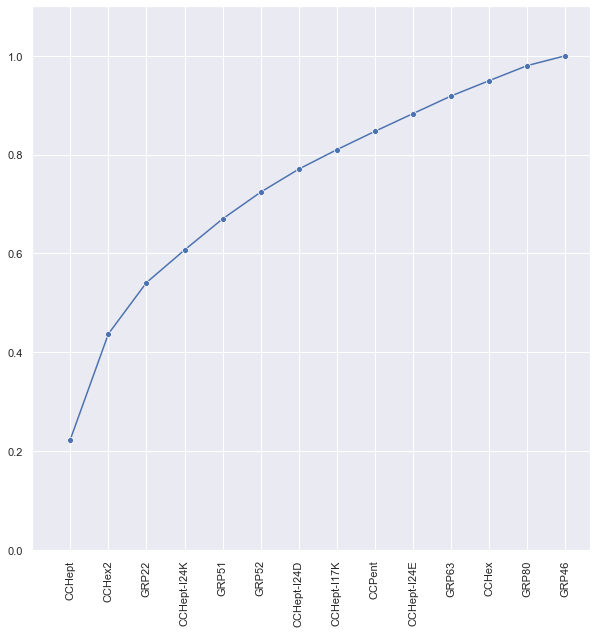

Feature     Score
0        CCHept  0.223277
1        CCHex2  0.213877
2         GRP22  0.103816
3   CCHept-I24K  0.065970
4         GRP51  0.062947
5         GRP52  0.054162
6   CCHept-I24D  0.046583
7   CCHept-I17K  0.039356
8        CCPent  0.037114
9   CCHept-I24E  0.035904
10        GRP63  0.035643
11        CCHex  0.031008
12        GRP80  0.030488
13        GRP46  0.019855

In [79]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

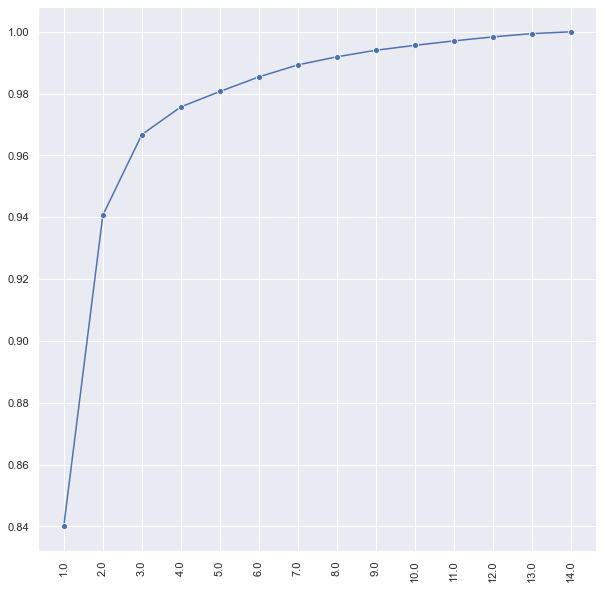

In [80]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [81]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [82]:
pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1         -0.282408 -0.282067 -0.262658 -0.300478  0.183475 -0.188084   
2          0.166655  0.000573  0.129531 -0.237975  0.852598 -0.171110   
3         -0.176356  0.183181 -0.237240  0.613349  0.384019  0.489288   
4         -0.337645 -0.351565 -0.453459  0.158880  0.114920 -0.123702   
5          0.012180  0.245331 -0.343864 -0.377624  0.124952  0.159236   
6          0.099621 -0.032641  0.318548  0.305099  0.230653 -0.216247   
7         -0.089964 -0.135343 -0.265064 -0.261093 -0.038027  0.134405   
8          0.088902 -0.174576 -0.278005  0.361699 -0.072434 -0.585539   
9         -0.522807 -0.107154  0.281019 -0.090143  0.000393  0.222786   
10         0.035792  0.259670 -0.016059 -0.071893  0.027907 -0.143449   
11        -0.153531 -0.352092  0.165652  0.051660  0.015236  0.146650   
12         0.604586 -0.248052 -0.320976  0.008899 -0.020107  0.346662   
13        -0.123437  0.535057 -0.261275  0.023542 -0.038610 -0.169181   
14        -0.205803  0.320223 -0.084278  0.019056 -0.018006 -0.084187   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1         -0.276483    -0.288241 -0.310689    -0.296903 -0.311167   
2          0.062602     0.069987  0.107230     0.147287  0.164146   
3          0.032175    -0.069792 -0.002834    -0.129306 -0.156592   
4         -0.076030     0.261443 -0.082849    -0.008358  0.201047   
5          0.244587    -0.240124  0.423741    -0.050734 -0.137513   
6         -0.178663     0.113756 -0.211552     0.154434 -0.074666   
7          0.157032     0.503473 -0.133746     0.373438  0.062957   
8          0.142640    -0.292557  0.392228     0.164131  0.092051   
9         -0.364800    -0.363327  0.240047     0.370119  0.310197   
10         0.114051    -0.353371 -0.512386    -0.182886  0.321324   
11         0.739910    -0.265264 -0.251323     0.167007  0.059051   
12        -0.276200    -0.245967 -0.145262     0.177960  0.340754   
13        -0.049802    -0.102442 -0.288556     0.599164 -0.162921   
14         0.061265     0.175741  0.037008    -0.302577  0.654793   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1            -0.304321 -0.233746    -0.155213  
2             0.020520  0.169915    -0.210639  
3             0.074514 -0.174062    -0.181618  
4             0.191373  0.441694     0.387061  
5             0.014350 -0.156942     0.542672  
6            -0.157625 -0.421083     0.610976  
7             0.193533 -0.554949    -0.175426  
8             0.071429 -0.257653    -0.196788  
9             0.115067 -0.096056     0.008650  
10            0.588980 -0.129580     0.060872  
11           -0.281415  0.072620     0.061397  
12           -0.204274  0.004236     0.042971  
13           -0.243545  0.238911    -0.037061  
14           -0.506763 -0.162532    -0.026155

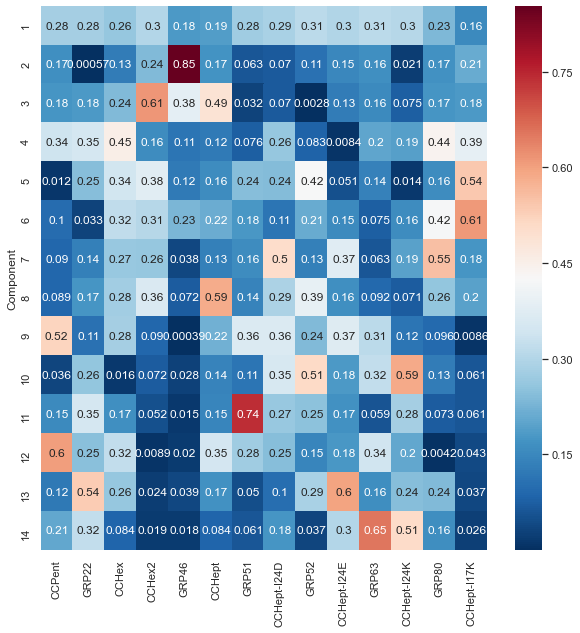

In [85]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [86]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [87]:
relative_pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1          0.097393  0.087394  0.076854  0.104282  0.086490  0.059136   
2          0.057474  0.000177  0.037901  0.082590  0.401916  0.053799   
3          0.060819  0.056756  0.069417  0.212866  0.181027  0.153839   
4          0.116442  0.108927  0.132682  0.055140  0.054173  0.038893   
5          0.004200  0.076012  0.100615  0.131056  0.058902  0.050066   
6          0.034356  0.010113  0.093207  0.105886  0.108730  0.067991   
7          0.031025  0.041934  0.077558  0.090614  0.017926  0.042259   
8          0.030659  0.054090  0.081344  0.125529  0.034145  0.184101   
9          0.180298  0.033200  0.082226  0.031285  0.000185  0.070047   
10         0.012344  0.080455  0.004699  0.024951  0.013155  0.045102   
11         0.052948  0.109091  0.048470  0.017929  0.007182  0.046109   
12         0.208500  0.076855  0.093918  0.003089  0.009478  0.108995   
13         0.042569  0.165779  0.076449  0.008170  0.018201  0.053193   
14         0.070974  0.099216  0.024660  0.006614  0.008488  0.026469   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1          0.099589     0.086158  0.098963     0.095030  0.102049   
2          0.022549     0.020920  0.034156     0.047142  0.053833   
3          0.011589     0.020861  0.000903     0.041387  0.051355   
4          0.027386     0.078148  0.026390     0.002675  0.065935   
5          0.088100     0.071776  0.134973     0.016238  0.045098   
6          0.064354     0.034003  0.067385     0.049430  0.024487   
7          0.056563     0.150493  0.042602     0.119527  0.020647   
8          0.051379     0.087448  0.124935     0.052534  0.030189   
9          0.131401     0.108602  0.076461     0.118464  0.101731   
10         0.041081     0.105626  0.163209     0.058536  0.105380   
11         0.266515     0.079290  0.080053     0.053454  0.019366   
12         0.099487     0.073522  0.046270     0.056960  0.111753   
13         0.017939     0.030621  0.091913     0.191775  0.053431   
14         0.022068     0.052531  0.011788     0.096846  0.214744   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1             0.102544  0.075063     0.057540  
2             0.006914  0.054565     0.078087  
3             0.025108  0.055897     0.067328  
4             0.064485  0.141842     0.143489  
5             0.004835  0.050399     0.201176  
6             0.053113  0.135224     0.226497  
7             0.065213  0.178212     0.065033  
8             0.024069  0.082741     0.072952  
9             0.038773  0.030847     0.003207  
10            0.198463  0.041612     0.022566  
11            0.094826  0.023321     0.022761  
12            0.068832  0.001360     0.015930  
13            0.082065  0.076722     0.013739  
14            0.170759  0.052194     0.009696

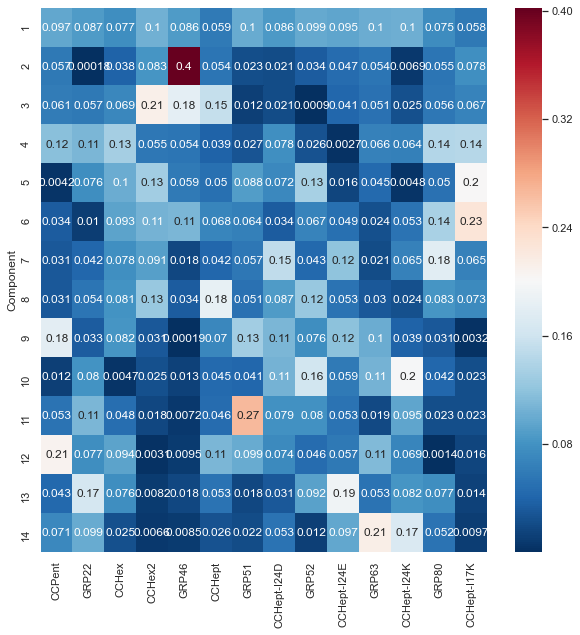

In [88]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [89]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

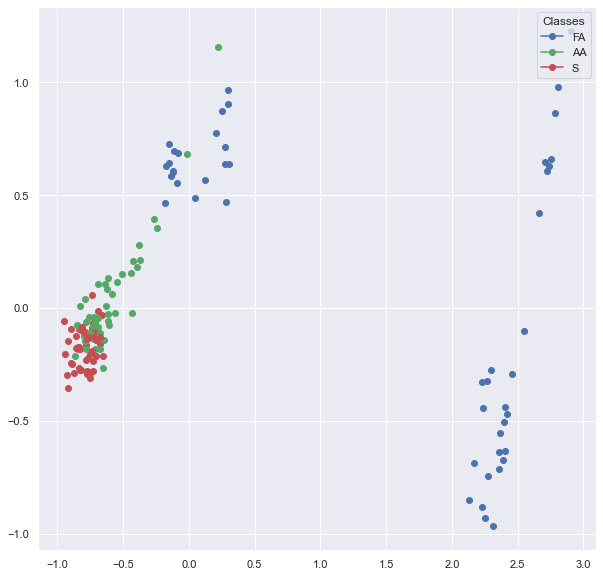

In [90]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['FA', 'AA', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_2D'
)

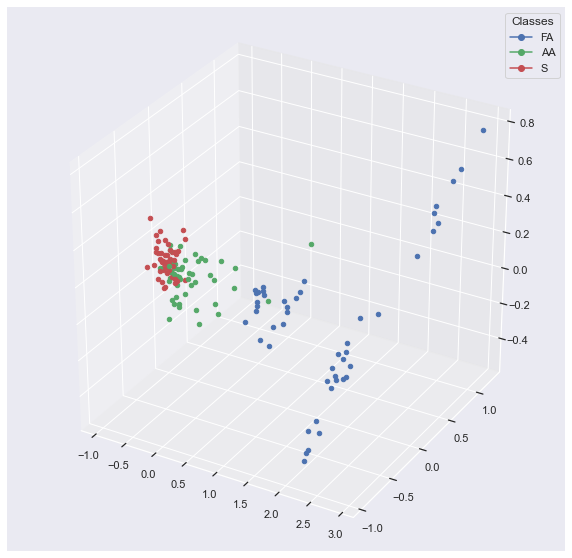

In [91]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['FA', 'AA', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_3D'
)

~97% of the variation in the data can be accounted for with 3 features, but to compare how well the model can be trained on the signal from the two different array sizes will not perform PCA.

In [92]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [93]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795}
Best score: 0.853463724671155
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10.0}
Best score: 0.8783101733720929


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1.0}
Best score: 0.8790097919509684
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.8783271086212263
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10.0}
Best score: 0.8599823150132748






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 17}
Best score: 0.8492455371712337
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 14}
Best score: 0.9125394431276785
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 12}
Best score: 0.8952404011537138
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 3}
Best score: 0.8696249610955494
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNei

Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.7649086958220085
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.8043001443001442
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.7944483065380898






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.7960703354666203
All parameter combinations tested:
1 {} 0.796






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.7924421788508476
All parameter combinations tested:
1 {} 0.792






GaussianNB: smote
Best parameters: {}
Best score: 0.7649086958220085
All parameter combinations tested:
1 {} 0.765






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.8043001443001442
All parameter combinations tested:
1 {} 0.804






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.7944483065380898
All parameter combinations tested:
1 {} 0.794
Randomised search with cross-validation results:
Best parameters: {'Linea

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.25, 'SVC__C': 1024.0}
Best score: 0.8776405946994184
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.7071067811865476, 'SVC__C': 362.03867196751236}
Best score: 0.8530922454451867






SVC: no_balancing
Best parameters: {'SVC__gamma': 0.00034526698300124393, 'SVC__C': 4096.0}
Best score: 0.8878141810030356
All parameter combinations tested:
1 {'SVC__gamma': 0.00034526698300124393, 'SVC__C': 4096.0} 0.888
2 {'SVC__gamma': 0.0001220703125, 'SVC__C': 512.0} 0.848
3 {'SVC__gamma': 0.03125, 'SVC__C': 2896.309375740099} 0.798
4 {'SVC__gamma': 4.315837287515549e-05, 'SVC__C': 90.50966799187809} 0.53
5 {'SVC__gamma': 0.0001220703125, 'SVC__C': 0.5} 0.235
6 {'SVC__gamma': 8.0, 'SVC__C': 0.3535533905932738} 0.288
7 {'SVC__gamma': 0.3535533905932738, 'SVC__C': 64.0} 0.77
8 {'SVC__gamma': 2.0, 'SVC__C': 32.0} 0.801
9 {'SVC__gamma': 0.7071067811865476, 'SVC__C': 0.0625} 0.569
10 {'

In [94]:
score_df

Algorithm Resampling_method  \
0     LogisticRegression      no_balancing   
1     LogisticRegression      max_sampling   
2     LogisticRegression             smote   
3     LogisticRegression          smoteenn   
4     LogisticRegression        smotetomek   
5   KNeighborsClassifier      no_balancing   
6   KNeighborsClassifier      max_sampling   
7   KNeighborsClassifier             smote   
8   KNeighborsClassifier          smoteenn   
9   KNeighborsClassifier        smotetomek   
10            GaussianNB      no_balancing   
11            GaussianNB      max_sampling   
12            GaussianNB             smote   
13            GaussianNB          smoteenn   
14            GaussianNB        smotetomek   
15             LinearSVC      no_balancing   
16             LinearSVC      max_sampling   
17             LinearSVC             smote   
18             LinearSVC          smoteenn   
19             LinearSVC        smotetomek   
20                   SVC      no_balancing   
21                   SVC      max_sampling   
22                   SVC             smote   
23                   SVC          smoteenn   
24                   SVC        smotetomek   

                                          Best_params  Best_f1_score  \
0   {'LogisticRegression__solver': 'saga', 'Logist...       0.853464   
1   {'LogisticRegression__solver': 'newton-cg', 'L...       0.878310   
2   {'LogisticRegression__solver': 'saga', 'Logist...       0.879010   
3   {'LogisticRegression__solver': 'newton-cg', 'L...       0.878327   
4   {'LogisticRegression__solver': 'lbfgs', 'Logis...       0.859982   
5   {'KNeighborsClassifier__weights': 'distance', ...       0.849246   
6   {'KNeighborsClassifier__weights': 'uniform', '...       0.912539   
7   {'KNeighborsClassifier__weights': 'distance', ...       0.895240   
8   {'KNeighborsClassifier__weights': 'distance', ...       0.869625   
9   {'KNeighborsClassifier__weights': 'uniform', '...       0.866699   
10                                                 {}       0.796070   
11                                                 {}       0.792442   
12                                                 {}       0.764909   
13                                                 {}       0.804300   
14                                                 {}       0.794448   
15                          {'LinearSVC__C': 32768.0}       0.854995   
16               {'LinearSVC__C': 0.1767766952966369}       0.822968   
17              {'LinearSVC__C': 0.08838834764831845}       0.865353   
18               {'LinearSVC__C': 2.8284271247461903}       0.794137   
19                              {'LinearSVC__C': 4.0}       0.889035   
20  {'SVC__gamma': 0.00034526698300124393, 'SVC__C...       0.887814   
21          {'SVC__gamma': 0.0078125, 'SVC__C': 32.0}       0.894728   
22  {'SVC__gamma': 0.0006905339660024879, 'SVC__C'...       0.886481   
23             {'SVC__gamma': 0.25, 'SVC__C': 1024.0}       0.877641   
24  {'SVC__gamma': 0.7071067811865476, 'SVC__C': 3...       0.853092   

    Mean_f1_score  Std_dev_f1_score  
0        0.730980          0.065990  
1        0.823550          0.059044  
2        0.756059          0.044584  
3        0.640177          0.058293  
4        0.819192          0.046380  
5        0.818405          0.078700  
6        0.870551          0.053879  
7        0.852194          0.063230  
8        0.733347          0.095471  
9        0.842963          0.056959  
10       0.796070          0.090756  
11       0.792442          0.078788  
12       0.764909          0.093055  
13       0.804300          0.135134  
14       0.794448          0.077470  
15       0.836182          0.033341  
16       0.779611          0.062180  
17       0.830537          0.080510  
18       0.719644          0.092470  
19       0.838166          0.055672  
20       0.737118          0.072344  
21       0.735276          0.063101  
22       0.768102          0.069428  
23       0.551643          0.0487

So, from this spot check, **support vector classifier with radial basis function  kernel**, with class rebalancing using **SMOTE** does a good job (not the best job of all the options tested, but it performs well and prefer to use the same methodology for better comparison between the two array sizes).

So, run hyperparameter optimisation for SVC with SMOTE.

In [95]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)  # Actual number of x samples
# will be different owing to oversampling, but don't want to hard code this selection into the pipeline, so for
# now this estimate will do to define the ranges of values to test for some of the hyperparameter values

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='random search', fixed_params=fixed_params, tuned_params=random_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.0013810679320049757, 'SVC__C': 64.0}
Best score: 0.8936064142256093


In [96]:
grid_tuned_params = {'gamma': np.linspace(0.0001, 0.01, 100),
                     'C': np.linspace(1, 100, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='grid search', fixed_params=fixed_params, tuned_params=grid_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 32.0, 'SVC__gamma': 0.0085}
Best score: 0.8969123159835235


### So, optimal hyperparameter combination:
- C = 32
- gamma = 0.0085

Model cross-validation score: [0.87044534 0.82222222 0.83068783 0.90522876 0.79084967]
accuracy_score: 0.8275862068965517
recall_score: 0.8333333333333334
precision_score: 0.8357142857142857
f1_score: 0.8238108640585421
cohen_kappa_score: 0.7415329768270944
None


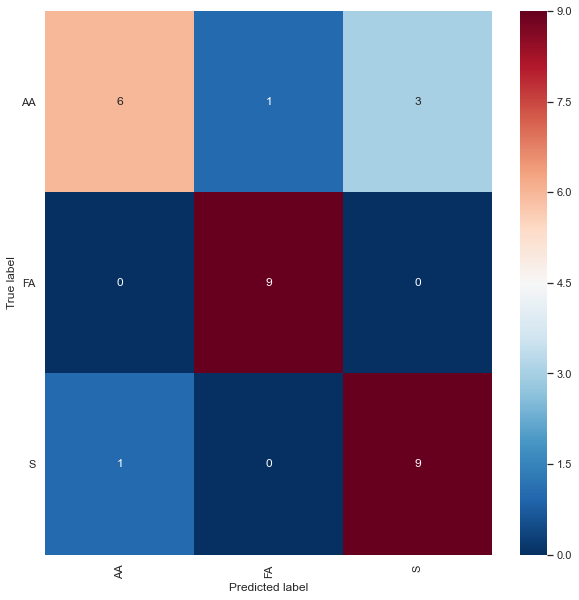

true


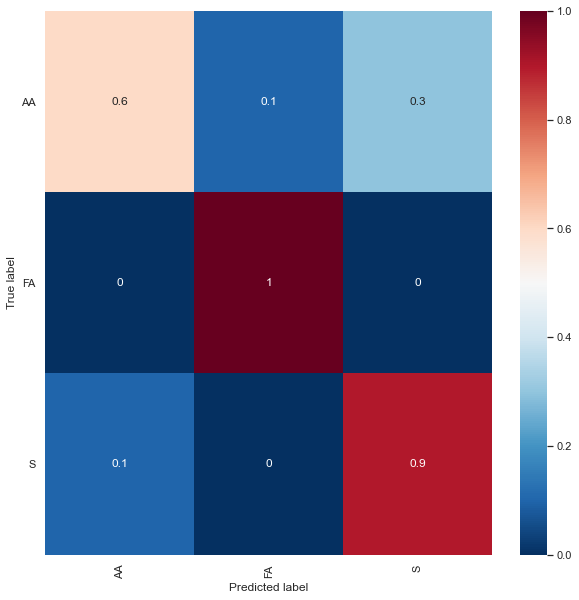

pred


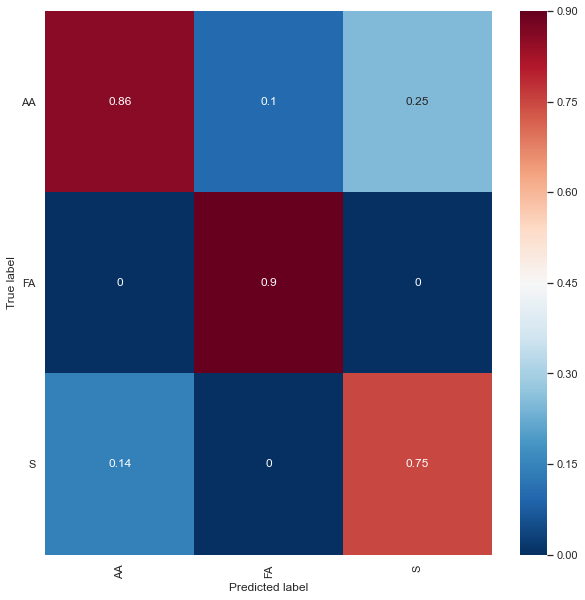

In [97]:
final_params = {'C': 32,
                'gamma': 0.0085}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='train', fixed_params=fixed_params, tuned_params=final_params,
    train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs, resampling_method=['smote'],
    n_iter=n_iter, cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

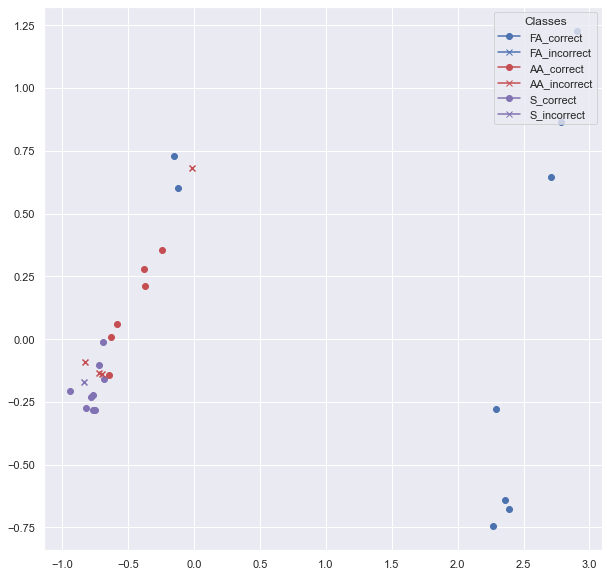

In [100]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['FA_correct', 'FA_incorrect', 'AA_correct', 'AA_incorrect', 'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

So, appears that larger array has slightly better performance, but would need to perform bootstrapping to judge whether the performance is significantly better.